In [146]:
%load_ext autoreload
%autoreload 2
from notebook import *
hist_size=10000000
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  Student ID
3.  @ucsd.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">Lab 5: Parallelism</div>
<div style=" font-size: 100% !important;
    line-height: 1.0;
    text-align:center;">Or, if we are being honest, mostly it's Caches Part III</div>
    
    


Modern computers exploit parallelism in many ways:  

1.  They can execute multiple threads at once.
2.  They can execute instructions in parallel.
3.  They can handle multiple memory requests at once.

We are going to look at each of these kinds of parallelism, but we'll spend the most time on threading, since it's the form of parallelism that's most apparent to the programmers and the one that takes the most effort to exploit.  Not surprisingly, we will find that much of what makes parallel code fast and slow has to do with how it uses memory.

In particular we are going to study:

1. Instruction level parallelism.
3. Memory-level parallelism.
4. Thread-level parallelism.
    1.  How it works.
    2.  How to use it.
    4.  Cache Coherence
    5.  Synchronization
    4.  False sharing
5.  Hyperthreading
6.  The OpenMP extensions for C/C++

This lab includes a programming assignment.

Check the course schedule for due date(s).

# FAQ and Updates

* There are no updates, yet.

# Additional Reading

If you want to learn _a lot_ more about optimizing matrix multiply, try this paper:  https://www.cs.utexas.edu/~flame/pubs/GotoTOMS_revision.pdf

# Before You Do Anything Else

Run this cell.  It'll fix your git repo history so you can successfully merge in updates

In [ ]:
!./fix-repo

# Browser Compatibility

We are still working out some bugs in some browsers.  Here's the current status:

1.  Chrome -- well tested.  Preferred option. **Required for Moneta**
2.  Firefox -- seems ok, but not thoroughly tested.
3.  Edge -- seems ok, but not thoroughly tested.
4.  Safari -- not supported at the moment.
5.  Internet Explorer -- not supported at the moment.

At the moment, the authentication step must be done in Chrome.  You usually _will not_ have to re-authenticate between labs, so if things work OK for the first, things will probably work here. 

# About Labs In This Class

_This section is the same in all the labs.  It's repeated here for your reference._

Labs are a way to **learn by doing**.  This means you _must_ **do**.  I have built these labs as Jupyter notebooks so that the "doing" is as easy and seamless as possible.

In this lab, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the lab asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

The questions are graded in one of three ways:

1. "Correctness" questions require you to answer the question and get the correct answer to get full credit.
2. "Completeness" questions require you to answer the question.
3. "Optional" questions are...optional.  They are there if you want to go further with the material.

Some of the "Completeness" problems include a solution that will be hidden until you click "Show Solution".  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss "Completeness" and "Optional" questions with your classmates.  You must complete "Correctness" questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.

## How To Succeed On the Labs

Here are some simple tips that will help you do well on this lab:

1.  Read/skim through the entire lab _before_ class.  If something confuses you, you can ask about it.
2.  Start early.  Getting answers on edstem/piazza can take time.  So think through the lab questions (and your questions about them) carefully.
    1. Go through the lab once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The DSMLP cluster gets busy and slow near deadlines.  "The cluster was slow the night of the deadline" is not an excuse for not getting the lab done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on edstem/piazza.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the lab was assigned!"  Good thought!

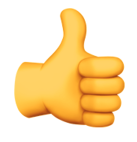


<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** DSMLP and our cloud machines will get crowded and slow _before every deadline_.  This is completely predictable.  DSMLP can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this lab.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If it says you are not authenticated, go to the [the login section of the lab](#Logging-In-To-the-Course-Tools) and (re)authenticate.
4.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the lab.
4.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
5.  If all else fails, post a question to edstem/piazza.

## Posting Answerable Questions on Edstem/Piazza

If you want useful answers on edstem/piazza, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which lab are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cse142` you _must_ provide the job id.  It looks like this: `544e0cf2-4771-43c3-86f8-1c30d7af601f`.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an edstem/piazza post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the edstem/piazza question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on edstem/piazza.  We will archive it and ask you to re-post your question with the information we need.
    
</div>

## Keeping Your Lab Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza/edstem when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


First, you need to run the `./fix-repo` in the cell at the top of this section.  After that you can run  

```
./pull-updates
```

at a terminal.

Then, reload this page in your browser.

## Editing Code

For programming assignments, it can be nice to use an editor other than the jupyter notebook editor.  Below are some student-provided instructions for using various editors with datahub.  These are supported, but if you provide feedback about them, we'll try to update and improve them.

### VSCode

1. Install the “SSH-Remote” extension in VS Code
2. Open the Command Palette in VS Code
3. Type “remote-ssh” and click “Remote-SSH: Connect current window to host”
4. It should ask you to put in the command: ssh {your_username}@dsmlp-login.ucsd.edu
5. If it asks for fingerprint authorization or something similar, accept
6. It should then ask for your password (your ucsd.edu email password)
7. Once logged in, click "Open Folder" in the file explorer sidebar
8. Open the folder pertaining to the lab you are working on


## How To Use This Document

You will use Jupyter Notebook to complete this lab.  You should be able to do much of this lab without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Logging In

If you haven't already, you can go to [the login section of the lab](#Logging-In-To-the-Course-Tools) and follow the instructions to login into the course infrastructure.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

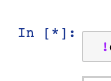


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

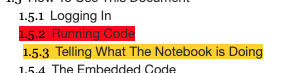

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

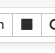

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

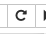

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  If you get a prompt asking `Do you want to cancel them and run this job?` but you can't reply because you can't type into an output cell in Jupyter notebook, replace `cse142 job run` with `cse142 job run --force`. (see useful tip below.)
4.  If you get an `Error: Your request failed on the server: 500 Server Error: Internal Server Error for url=http://cse142l-dev.wl.r.appspot.com/file`, trying running the job again.
5.  Sometimes `cse142 job run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
6.  If you get an error like this, stop your datahub server and restart it.

![image.png](attachment:image.png)

7. If you get `http.cookiejar.LoadError: '/home/youruserrname/.djr-cookies.txt` does not look like like a Netscape format cookies file.` remove the file and re-authenticate.
8.  The table of contents disappears and/or the questions are not highlighted like they usually are.  Do this:    
    1.  Go to the file browser in jupyter
    2.  At the top, there is tab labeled "Nbextensions".  Click on it.
    3.  find "Table of Contents (2)".  It should be checked.  Un check it, and check it again.
    4.  Click the "refresh button" (circular arrows)at upper right.
    5. Reload your notebook.
9.  You produce too much output from a program and your notebook refuses to open because it's too big.  Try
    1.  Backup up your notebook!
    2.  This will work, but it will clear _all_ your output: https://stackoverflow.com/a/47774393/3949036
    3.  You can open the notebook file in a text editor and remove the output manually.
    

### Useful Tips

1.  If you need to edit a cell, but you can't you can unlock it by pressing this button in the tool bar (although you probably shouldn't do this because it might make the lab work incorrectly.  A better choice is to copy and paste the cell, _and then_ unlock the copy):
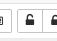

### The Embedded Code

The code embedded in the lab falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the lab will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

<div class="alert alert-block alert-info">

**Pro Tip** The "carrot" icon in the lower right (shown below) will open a scratch pad area.  It can be a useful place to do math (or whatever else you want.
    
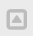
</div>

### Showing Your Work

Several questions ask you to show your work for calculations.  We don't need anything fancy.  Many of the questions ask you to compute something based on results of an experiment.  Your experimental results will be different than others', so your answer will be different as well.

To make it possible to grade your work (and give you partial credit), we need to know where your answer came from.  This why you need to show your work.  For instance this would be fine as answer to "On average, how many weeks do you have per lab?":

```
Weeks in quarter/# of labs = 5/5 = 1 week/lab
```

2 significant figures is sufficient in all cases, but you can include more, if you want.

If you are feeling fancy, you can use LaTex, but it's not at all required.

When it's appropriate, you can also paste in images.  However, Jupyter Notebook is flaky about it.  Save your notebook by clicking the disk icon:

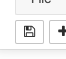

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

# Logging In To the Course Tools

    
In the course you will use some specialized tools to let you perform detailed measurements of program behavior.  To use them you need to login with your `@ucsd.edu` email address using the instructions below. **You need to use the email address that appears on the course roster.  That's the email address we created an account for.  In almost all cases, this is your `@ucsd.edu` email address.**

You'll do this periodically when you get an error about not being authenticated.  You can return to this notebook (or any other of the lab notebooks) to login at any time.

Here's what to do:

1.  Enter your `@ucsd.edu` email address in quotes after `login` below.  It'll take a few seconds to load.
2.  Click the google "G" login button below and login with your `@ucsd.edu` email address. 
3. **Click the google button regardless of whether it says "sign in" or "signed in".  Then be sure to select your `@ucsd.edu account` if it shows you multiple google acocunts**
4. You'll see a very long string numbers an letters appear above.  Click "Copy it" to copy it.

**Note:** If it doesn't give you a choice about which account to log into and authentication fails, that means you are logged into a single Google account and that account is _not_ your `@ucsd.edu` account.  You'll have to log into your `@ucsd.edu` through Gmail or through Chrome's account manager and then try again.

<div class="alert alert-block alert-danger">

**Use Chrome** The login process doesn't seem to work properly with Safari or Firefox.  Use Chrome to login.  You can use any of the other compatible browsers you want for the doing the rest of the lab, and it should be fine.

</div>



In [ ]:
login("<Your @ucsd.edu email address>") 


Next step:  Paste it below between the quote marks.  Press `shift-return`.

In [ ]:
token("your_token") 



It should have replied with

``` 
You are authenticated as <your email>
```

You are now logged in!  Try submitting a job: 

In [ ]:
!cse142 job run "echo Hello World"

If you see "Hello World", you're all set.  Proceed with the lab!

<div class="alert alert-block alert-danger">

Delete your token from the above cell. Because your token is esssentially your username and password combined, you should treat it like a password or ssh private key.  **Sharing your token with another student or posessing another student's token is an AI violation**.
</div>

# Grading

Your grade for this lab will be based on the following components

| Part                       | value |
|----------------------------|-------|
| Jupyter Notebook           | 48%   |
| Programming Assignment     | 50%   |
| Post-lab survey.           | 2%    |

No late work or extensions will be allowed.

We will grade 5 of the "completeness" problems.  They are worth 3 points each.  We will grade all of the "correctness" questions.

You'll follow the directions at the end of the lab to submit the lab write up and the programming assignment through gradescope. 

Please check gradescope for exact due dates.

# Instruction Level Parallelism

As you learned in CSE142, modern processors can exploit parallelism between instructions by fetching a large "window" of instructions and dynamically identifying instructions that can execute at the same time.  The algorithm it uses is pretty amazing and the fact that processors can do this at over 3GHz is mind-blowing.

<div style="background:black; padding:0.5em; color:white; margin-left:auto; margin-right:auto; margin-top:1em; margin-bottom:1em;  text-align:center"> [Meme Redacted For Space Reasons]</div>

But how well does it work?  How much ILP can we get?  Where does ILP come from?

## Let's Look at Our Machine

Here's a cartoon of our processor's functional units.

![image.png](img/issue_ports.png)

The blue units on the left can all execute basic arithmetic operations ("ALU") and two of them can execute our old friend `lea`.  One interesting note about this diagram:  There are 2 load unit and one unit each for store addresses and store data.  This means that processor can issue 2 loads but only one store per cycle.

<div class="question completeness">

<div class="question-text">
    
Based on this image, what's the minimum achievable CPI for ALU operations on our CPU? For load operations? For all operations?
    
</div>
    
<div class="answer">
    
**Minimum possible ALU CPI**:
    
**Minimum possible load CPI**:

**Minimum possible total CPI**:
    
</div>
    
</div>

<div class="solution"> 
   
It appears that the CPU can execute four ALU operations in one cycle.  So the minimum CPI would be 1/4 = 0.25.
    
For loads, it seems we can do 2 per cycle, so the CPI should be 1/2 = 0.5.

All together (loads, stores, and ALU), it appears that 1/7 = 0.142 should be possible.
    
Note that one store instruction takes up both the "store addr" and "store data" unit, so only one store can execute per second on average.
</div>

<div class="question completeness">

<div class="question-text">
    
Based on this design, do you think the designers are more concerned about achieving parallelism between memory operations or arithmetic (non-memory) operations?
    
</div>
    
<div class="answer">
    
</div>
    
</div>

<div class="question optional">

<div class="question-text">
    
Why does it "execute" the data and address for a store separately?
    
</div>
        
</div>

## Accounting For Branches

In this section we are going look at instruction dependencies and critical paths quite closely, following what you learned in CSE142.  Branches and comparison operations complicate things a little bit.  For the most part we will ignore comparison instructions and branch instruction when calculating critical paths.  This is because the processor speculates on branches, this means that these instructions don't have much impact on the performance of the processor's out-of-order execution engine.  Since the processor only uses them to detect mis-speculations, it never has to wait on them.

We do, however, count those instructions when calculating _how many_ instructions have executed.  While comparisons and branches don't contribute latency to the execution, they do eventually have to execute, so the processor's branch predictions can be checked.


## Experiments

Here's a simple function (run the code to see it).  I've turned off optimizations and use `register` to get `i` into a register.

Study the code and pay particular attention to the data dependences between the instructions in the inner loop body.

In [14]:

t = fiddle("ilp.cpp", function=["wide_1", "wide_2", "wide_3", "wide_4", "wide_5"], name="ilp", opt="-O0", run=[], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")
compare([t.source, t.cfg])


<div class="question completeness">

<div class="question-text">
    
What's the critical path length through $n$ iterations of the inner loop body of `wide_1()`?  Based on the dependences in the inner loop, estimate the CPI for this code (assuming the inner loop runs many, many times).        
</div>
    
<div class="answer">
    
1. **critical path**:
    
2. **CPI**:
</div>
    
</div>

<div class="solution"> 

Here's a drawing of of dependences for two iterations (first iteration in red, the second in blue).
    
![image.png](img/wide_1_dep.png)


All the `addq` instructions in the body read and write `rbx`, so each is dependent on the one prior to it, and there is a cross-loop dependence on `rbx` as well.
    
Further, the `cmpq` is dependent on the last `addq` as well, and the `jae` is dependent on the `cmpq`. However, they don't add to the critical path for two reasons:
    
1. Nothing is dependent on the `jae`
2. The `jae` is a very predictable branch, so it and the `cmpq` will not affect execution very much.  Likewise, we can ignore the `jmp` as well.
    
So, the critical for $n$ iteration is $6n$.

The nominal latency for an `addq` is 1 cycle, so the latency of $n$ iterations is about $6n$ cycles.    There are 9 instructions per iteration, so `CPI` should be 6/9 = 0.66.

</div>

Let's see how it comes out:

In [15]:

t = fiddle("ilp.cpp", function=["wide_1"], name="ilp", opt="-O0", analyze=False, run=["perf_count"], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")

render_csv("ilp.csv", columns=["function", "IC", "CPI", "CT", "ET"])

Pretty good agreement!

Let's try this function.  Same questions.

In [16]:

t = fiddle("ilp.cpp", function=["wide_2"], name="ilp", opt="-O0", run=[], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")
compare([t.source, t.cfg])


<div class="question correctness points-2">

<div class="question-text">
What's the critical path length through $n$ iterations of inner loop body of `wide_2()`?  Based on the dependences in the inner loop, estimate the CPI for this code (assuming the inner loop runs many, many times).        
</div>
    
<div class="answer">
    
1. **critical path**: 
    
2. **CPI (show your work)**: 
</div>
    
</div>

In [17]:

t = fiddle("ilp.cpp", function=["wide_2"], name="ilp", opt="-O0", analyze=False, run=["perf_count"], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")

render_csv("ilp.csv", columns=["function", "IC", "CPI", "CT", "ET"])

I have three more of these functions: `wide_3()` through `wide_5()` with more parallel sequences of dependent increments: 

In [147]:
render_code("ilp.cpp", show="wide_5")

Let's see how they compare:

In [19]:

t = fiddle("ilp.cpp", function=["wide_1", "wide_2", "wide_3", "wide_4", "wide_5"], name="ilp", opt="-O0", run=["perf_count"], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")


In [20]:
display(render_csv("ilp.csv", columns=["function", "IC", "CPI", "ET"]))
plotPEBar("ilp.csv", what=[("function", "CPI")])

Wow, we came very close to hitting our theoretical minimum CPI!:  The processor can issue up to 4 arithmetic instructions per cycle and we got a CPI of just about 0.25.

## Dynamic Loop Unrolling

`wide_5()` is not a very realistic function, since it has an artificially huge amount of ILP.  But ILP can arise in more natural ways as well.

Below is a function that represents a common pattern:  A loop body that computes a value based on the loop index and stores it somewhere.  In this case, the computations is a long chain of additions.   Study it and answer the question below.

In [21]:

t = fiddle("unroll.cpp", function="unroll_1", opt="-O0",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* unroll_1(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    register uint64_t a = 4;

    for(register uint64_t i = 0; i < size; i++) {
       a = i+1;
       a = a+1;       
       a = a+1;       
       a = a+1;       
       a = a+1;       
       data[i] = a;
    }
    data[0] = a;
    return data;
}
FUNCTION(one_array_2arg, unroll_1);
""", run=[], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")
display(t.cfg)

<div class="question completeness">

<div class="question-text">
What's the critical path length through $n$ iterations of inner loop body of `unroll_1()` (assume $n$ is large)?  Estimate the CPI for this code (assuming the inner loop runs many, many times, and the latency for each instruction is 1).        
</div>
    
<div class="answer">
    
1. **critical path**:
    
2. **CPI**:
</div>
    
</div>

<div class="solution">
    
Here's a sketch of the data dependences in this loop across 4 iterations.  The instructions are abbreviated to their first letter:

![image.png](img/unrolled_dependences.png)
    
The critical path through one loop iteration is 6 instructions.  The key is that while there is a cross iteration dependence on `r12` that dependence chain is very short, so the processor can start executing a new iteration of the loop  (i.e., compute a new value of `r12`) every cycle.  That means that many iterations of the loop will be "in flight" at once.

For large $n$, the critical path is $n$ (for the increments on `r12`) plus the critical path through last iteration of the loop.  In the example above this is 9 (3 increments of `r12` plus 6 instructions in last iteration).  In general, it would $n + 6$.
    
There are 13 instructions per iteration.  So, a first cut at CPI would be $(n + 6)/13n$.  For large, $n$ this becomes 1/13 = 0.07, which would be amazing!   However, it's not to be:  The loop is all ALU instructions plus one store, and the CPU can only issue 4 ALU instructions per cycle.  The store will add a little more parallelism, so CPI can't be much better than 1/4 = 0.25.

</div>

Let's see how it does:

In [22]:

t = fiddle("unroll.cpp", function="unroll_1", opt="-O0", analyze=False, run=["perf_count"], 
           cmdline=f"--size 10000000", 
           perf_cmdline="--stat-set PE.cfg --MHz 3500")

In [23]:
render_csv("build/unroll.csv",columns=["function", "IC", "CPI", "CT", "ET"])

That falls a short of our expectation.  Figuring out why would require some careful investigation, but there are a few complications the analysis above didn't consider:

1.  The load from `var_20h` is 4 cycles, so the path from that instruction to store is 5 cycles, which is _almost_ the critical path.  Unlucky scheduling could increase the latency further.
2.  The load, store, and `lea` instructions can only issue subsets of the functional units.

<div class="question optional">

<div class="question-text">

Copy the code for `unroll_1()` to create new function called `unroll_byhand()`.  Can you unroll the loop by hand and get better performance than the processor can unrolling it in hardware?    

</div>
    
<div class="answer">
    
1. **critical path**: 
    
2. **CPI (show your work)**: 
</div>
    
</div>

# Memory-level Parallelism

One of the key themes in this class is that it's really all about memory, so it is with ILP as well:  Parallelism among arithmetic instructions is fine, but it's the parallelism among memory operations that really pays off.  

In fact memory parallelism is so important that it has its own name: Memory Level Parallelism (MLP).

Let's take a look at a new and improved miss machine and use it to explore MLP.

## Miss Machine++

Our new miss machine is much like the old one except it's wrapped up in a class so we can easily create more than one of them and pass them around as objects.  It also has support for performing stores in addition to loads as it walks around the links.   Look over the code and make sure you understand it.

In [148]:
render_code("MissMachine.hpp")

## Parallel Miss Machines

We will use `MissMachine` to create parallel chains of loads much like we built parallel chains of adds in the previous section.

The code below accomplishes this by creating a miss machine, and then spreading four pointers uniformly along the circular chain of links.  Then we traverse the chain at all four points in the chain in parallel.  Here's the code and the assembly (sorry, the CFG tool breaks on this code for some reason).  The key basic block is the three instructions after `.L196`, `al` and `bl` are in `rax` and `rbx`.

![image.png](img/miss_machine_loop.png)

In [25]:
#key data_cell
miss_machines = fiddle(fname="miss_machines.cpp", function="sample", opt="-O3", number_nodes=True, run=[])
compare([miss_machines.source, miss_machines.asm])

<div class="question correctness points-4">

<div class="question-text">
What's the critical path (in cycles) for the inner loop above?  And what's the estimated CPI.  Recall that the latency for a cache hit on our machine is 4 cycles.  Assume the loads all hit. </div>
    
<div class="answer">
    
1. **critical path**:  
    
2. **CPI**:  
    
</div>
    
</div>

### L1 Hits

Our goal is to measure our processor's L1 cache bandwidth by maximizing memory-level parallelism.  To do this, `miss_machines.cpp` has a function with a large switch statement that starts like this:

In [149]:
render_code("miss_machines.cpp", show=("//START", "//END"))

Each `case` runs the same loop with a different number "miss chains" -- parallel sequences of loads.  You can look as the assembly if you want, but it's long and messy:

In [27]:
render_code("build/miss_machines.s", lang="gas", show="miss_machines")

<div class="question optional">

<div class="question-text">

How did the compiler implement the switch statement?  Is it faster than a sequence of `if-else` statements?
    
</div>
    
    
</div>

As we add more parallel chains, bandwidth will increase, but only to a point.

![image.png](img/issue_ports.png)

<div class="question completeness">

<div class="question-text">
Based on the diagram above, how many parallel miss chains will produce the maximum L1 bandwidth (most loads completed per second)?  What do you think that bandwidth will be?  With that number of miss chains, what will the CPI be?  Remember: Load hits take 4 cycles.
 </div>
    
<div class="answer">
    
**How many miss chains**: 
    
**L1 Bandwidth**:  
    
**CPI**:
    
</div>
    
</div>

<div class="solution">

The diagram shows two load units, which suggests that the processor execute two loads per cycle.  We'll call this the maximum _issue rate_.  This would seem to suggest that 2 miss chains would be sufficient.  They would run at 3.5GHz giving us $7\times 10^9$ loads of 8 bytes per second or 56GB/s.  
    
However, there is a catch:  Each load takes 4 cycles.  So it's not so much that the processor can "perform" two loads at a time, but that it can _start_ two loads at a time.  Those loads will finish 4 cycles later.  In the three intervening cycles, the processor could start 6 more loads.
    
This suggests that we will need 8 miss chains to achieve our 56GB/s.

To compute the CPI, we can look at the loop body for `mm_sample()`:

```gas
.L194:
	movq	(%rax), %rax
	movq	(%rbx), %rbx
	subl	$1, %edx
	jne	.L194
```

Two loads -- one per miss chain -- and 2 more instructions.  With 8 chains, that'd be 10 (1 per miss-chain + 2 more) instructions per loop iteration with a critical path of 4 cycles (The latency of 1 load), so that'd be a CPI of 0.4.

If you dig through the longer assembly list above, you'll find that is not quite right.  Here's the loop body for 8 miss-chain loop:
    
```gas
    
.L122:
	leal	1(%rbx), %r13d
	movq	(%rax), %rax
	movq	(%rdx), %rdx
	movq	(%rsi), %rsi
	movq	(%rdi), %rdi
	movq	%r13, %rbx
	movq	(%r8), %r8
	movq	(%r12), %r12
	movq	0(%rbp), %rbp
	movq	(%r11), %r11
	cmpq	%r15, %r13
	jb	.L122
```

It has 13 instructions (I'm not sure what the extra three instructions are for), which would make the CPI 4/13=0.31.
    
</div>

Let's see how it comes out:

In [28]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L1_hit_machine", opt="-O3 ", analyze=False, run=['perf_count'], 
           cmdline=f"--size {4*4096} --arg1 8 --arg2 1 2 3 4 5 6 7 8 9 --arg3 10000000", 
           perf_cmdline=f"--stat-set L1.cfg --MHz 3500  --calc GB_per_sec=arg3*arg2*8/ET/{1024*1024*1024}")


In [29]:
display(render_csv("L1_hit_machine.csv", columns=["size", "arg1", "IC", "CPI", "CT", "ET", "L1_MPI", "GB_per_sec"]))
plotPE("L1_hit_machine.csv", lines=True, what=[("arg2", "CPI"),("arg2", "GB_per_sec")])

Pretty good! 

So, our processor can handle (at least) at 8 outstanding loads.  Recall that earlier, the lab asked whether the processor cared more about (i.e., could exploit more) parallelism between arithmetic operation or memory operations.  What did you answer?  What do you think now?

Executing loads from parallel miss chains simultaneously allows the processor to "hide" memory latency:  Even though each load takes 4 cycles, running them in parallel makes it appear that each takes just 0.33 cycles on average.

It's nice to hide the 4-cycle L1 hit time, but, as you learned from the last two labs, L1 hits are not where the real problems lie.

<div class="question optional">

<div class="question-text">

Edit `miss_machines.cpp` to add another `case` that minimizes CPI.  How low can you go?

</div>
        
</div>

### L1 Misses

Let's see about hiding the latency of some L1 misses that hit in the L2.  To do this, we'll just expand the size of our miss machine to fit in the L2 but not the L1.  THe L2 is 256kB, so 128kB should do it.  We'll also increase the link size to 64 bytes so we don't have any cache line reuse.

In [30]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L1_miss_machines", opt="-O3 ", analyze=False, run=['perf_count'], 
           cmdline=f"--size {128*1024} --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 10000000", 
           perf_cmdline=f"--stat-set L1.cfg --MHz 3500  --calc GB_per_sec=arg3*arg2*8/ET/{1024*1024*1024}")


In [31]:

display(render_csv("L1_miss_machines.csv", columns=["size", "arg1", "IC", "CPI", "CT", "ET", "L1_MPI", "GB_per_sec"]))
plotPE("L1_miss_machines.csv", lines=True, what=[("arg2", "CPI"), ("arg2", "GB_per_sec")])

<div class="question completeness">

<div class="question-text">

Answer the questions below:
    
</div>

<div class="answer">
    
**How many outstanding cache misses can the processor handle?**
        
**What's the peak bandwidth?**
    
</div>
    
</div>

<div class="solution">
    
**How many outstanding cache misses can the processor handle?**   In the experiment we increase the amount of MLP _in our program_ from 1 to 13 parallel load chains.  When the number of parallel load chains exceeds the number of parallel loads the processor can handle, performance stops improving (i.e., CPI stops dropping) because performance doesn't benefit from the additional parallelism.  Put another way, the program now has more ILP than the hardware can make use of.  For the data I got for this experiment this happened with 10 miss chains, so I conclude that the number of outstanding misses the processor can handle is 10.
        
**What's the peak bandwidth?**  This is just the highest point in the graph on the right.  For me it was about 21.8GB/s.
    
</div>

Let's go further!

### L2 Misses

Same drill:  We'll increase the miss machine size so it fit's in the L3 but not the L2:  The L3 is 12MB, so 2MB should be enough.

In [32]:
t = fiddle(fname="miss_machines.cpp", function="miss_machines", name="L2_miss_machines",
           opt="-O3 ", analyze=False, run=['perf_count'], 
           cmdline=f"--size {2*1024*1024} --arg1 64 --arg2 1 2 3 4 5 6 7 8 9 10 11 12 13 --arg3 100000000", 
           perf_cmdline=f"--stat-set L2.cfg --MHz 3500  --calc GB_per_sec=arg3*arg2*8/ET/{1024*1024*1024}")


In [33]:
display(render_csv("L2_miss_machines.csv", columns=["size", "arg1", "IC", "CPI", "CT", "ET", "L2_MPI", "GB_per_sec"]))
plotPE("L2_miss_machines.csv", lines=True, what=[("arg2", "CPI"), ("arg2", "GB_per_sec")])

Still 10 misses, but just over 6GB/s and an average latency of 3.2 cycles, and the L3 can do about 5.8GB/s.

We are going to stop there.  The next step would be to do L3 misses, but it would take a lot more work to get meaningful results for DRAM, and the results are strongly dependent on how our systems are configured, which we discussed (and measured the bandwidth of in Lab 3).



# Thread Performance

ILP and MLP exist within a single core, and the degree of parallelism is limited by the number of instructions the CPU can issue per cycle.  To get more parallelism, we need to use more CPUs, and for that we'll need to create threads.

A thread is a flow of control through your program that runs on a processor.  Every program has at least one thread, and by creating multiple threads you can spread the work of your program across many cores, hopefully improving it's performance.

Making programs fast via multi-threading is an extremely deep and complex area.  We could easily spend an entire quarter studying techniques for creating, managing, and using threads, and most universities (including UCSD) offer several courses on this topic (Start with Operating Systems and then take the graduate Parallel Computation course).  Indeed, some people have devoted their entire careers to the topic.  

All this effort is for good reason:  the amount of ILP and MLP that individual cores can utilize has been roughly constant over last decade and shows no signs of improving much.  Making matters worse, clock speeds are growing very slowly.  That means that adding cores is the main way that computer are getting faster, but that only works if we can use threads effectively.

But, it's week 8, and we don't have time for all of that.  Instead, we are going to take a whirlwind tour of how you can create threads, how to make them communicate with one another, why the underlying hardware can make that hard and/or slow, and what you can do about it.

To start, let's see how many cores we have:

In [36]:
!cse142 job run --lab parallel --force 'lscpu'

The key lines are `Socket(s): 1` and `Core(s) per socket:  6`.  A "socket" is place on a motherboard to stick a physical CPU.  We have 1, so all our cores live on one chip. That chip has 6 "cores".  A core is complete processor pipeline. 

You might notice that it also says `CPU(s): 12`.  This would be better phrased as "logical cores".  It's twice the number of actual (physical) cores because each of the cores can run two threads at once via Hyperthreading.  These cores are numbered 0-11.

By convention, the lower half of the core numbers cover one logical core on each physical core.  The top half of the numbers are the second logical cores.  So, logical core 0 and logical core 6 are on the same physical core.

For now, we are going to stick to logical cores 0-5.  We'll return to the upper 6 logical processors later in the lab.

## Spawning Threads

The first step to using threads is to create some.  C++ has pretty good threading facilities.  The key is the `std::thread` object that represents a running thread.  To start a thread, you create an `std::thread` object and pass it a function to call and the arguments you'd like to pass to the function.

The `std::thread`'s `join()` method waits for the thread to complete.

Here's some code that runs three threads that print out some numbers. The cell below will run the code three times separated by "FINISHED EXECUTION".  Pay close attention to the output of each run.

In [37]:

t = fiddle("threads.cpp", function=["threads", "threads", "threads"], analyze=False,  opt="-O0",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>

void go() {
    for(int i = 0; i < 10; i++) 
        std::cerr << i << "\n";
}

extern "C"
uint64_t* threads(uint64_t threads, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    std::thread t1(go);  // Create a thread to run go().  Pass no arguments.
    std::thread t2(go);
    std::thread t3(go);
    
    t1.join(); // wait for t1 to finish.
    t2.join();
    t3.join();
    std::cerr << "FINISHED EXECUTION\n";
    return data;
}
FUNCTION(one_array_2arg, threads);
""", run=["perf_count"])

See how the order of the number changes?  This is because the relative execution rate of each thread is different.  Also, the threads take turns writing to standard output and the order they go in is non-deterministic.

This non-determinism is the bane of multi-threaded debugging:  Imagine if your bug only occurred for one of the very many possible orderings of the operations in your threads?  Your bug might occur just 1 in 100 (or 1000 or 10,000) times you run the program.

## Measuring Thread Behavior

Of course, we will want to measure the performance and behavior of our threads.  Things get a little tricky here, because of a limitation of our performance counter measurement library.  It can only measure performance counters of the main thread of the program.  

For the experiments we are going to run this is not a big problem: All our threads will be doing the same thing at the same time, so measuring one is a good as measuring any other.  In some cases, though, we will need to _estimate_ aggregate values across all the cores/threads.  For instance, if we want to estimate the _total_ number of instructions execute by all threads, we'll multiply the single-thread IC we measure for one thread by the thread count.

Here's a simple threaded program that runs one miss chain in each of several threads.

In [38]:

t = fiddle("threads.cpp", function="threads", analyze=False,  opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include"MissMachine.hpp"

void go(MissMachine * machine, uint64_t arg2) {
    machine->load_miss(arg2);
}

extern "C"
uint64_t* threads(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    MissMachine a( arg1, size);
    a.make_links();

    std::thread **threads = new std::thread*[thread_count-1]; // Alloce space for some pointers
    for(unsigned int i = 0; i < thread_count-1; i++) {
        threads[i] = new std::thread(go, &a, arg2); // create the threads.  They will each run the miss machine.
    }
    go(&a, arg2); // So will this thread, hence the -1
    for(unsigned int i = 0; i < thread_count-1; i++) { // wait for everyone else
        threads[i]->join();
        delete threads[i]; // cleanup
    }
    delete threads; // cleanup.
    
    return data;
}
FUNCTION(one_array_2arg, threads);
""", run=["perf_count"], 
           cmdline=f"--size 4096 --arg1 8 --arg2 100000000 --thread 1 2 3 4 5 6", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [39]:
#key data_cell
display(render_csv("build/threads.csv", columns=["thread", "size", "arg1", "IC", "CPI", "CT", "ET", "L1_MPI"]))
plotPE("build/threads.csv", lines=True, what=[("thread", "IC")])

<div class="question correctness points-1">

<div class="question-text">
With 6 threads how many total instructions were executed?
</div>
    
<div class="answer">
    
**Total IC**: 
    
</div>
    
</div>

## Thread Communication with Volatile Variables and Locks

In order for threads to work together, they must share variables:  _Sharing_ means that more than one thread is reading and/or writing to the variable during the same period of time.  Threads working together _must_ share some information, otherwise they cannot make progress together on a common goal.  For example, imagine expecting 8 people in sealed rooms, who have never met, to make progress on a single task -- it is not possible.

There are two separate problems we need to solve.  The first is _how_ to share data and the second is how to share it in a coordinated and reliable way. 

### Sharing Data Between Threads with `volatile`

The code below declares a global variable, initializes it to zero, and then provides `wait()` to wait for it to change.  It also provides `signal()` to update the global variable.  You could imagine that two threads could use these two function to coordinate in a simple way:  Thread `T1` could call `wait()` to wait for another thread, `T2`, to do something.  When `T2` is done, it could call `signal()` to let `T1` know it has done it.


In [40]:

t = fiddle("not_shared.cpp", function="wait", analyze=True,  opt="-O3",
code=r"""

int flag = 0;
extern "C"
void wait() {
    while(flag);
}

void signal() {
    flag = 1;
}
""", run=None)
t.cfg

As written and compiled with optimizations, the compiler does what we would expect:  it checks `flag` once. If it's non-zero (i.e., it evaluates to `true`), it returns.  Otherwise it loops infinitely.  This will clearly not work as a thread communication mechanism:  Unless `T2` calls `signal()` _before_ `T1` calls `wait()`, `T1` will never get the message.

The compiler is assuming that `flag` _will not change_.  This is a valid assumption for the compiler to make because, by default, variables in C and C++ are considered to the thread-private -- only the current thread will access them.  That's not what we want for thread communication.

We can fix this by declaring `flag` as `volatile`.  `volatile` tells the compiler that the variable is shared and so it might change at any time, which dramatically reduces the number of optimizations it can apply.  Let's see what it does now:

In [41]:

t = fiddle("not_shared.cpp", function="wait", analyze=True,  opt="-O3",
code=r"""

volatile int flag = 0;
extern "C"
void wait() {
    while(flag);
}

void signal() {
    flag = 1;
}

""", run=None)
t.cfg

Now, `wait()` checks `flag` every time, and our communication mechanism will work.  Or will it...

### Memory Ordering

Here's a slightly more complicated example that actually uses our communication mechanism: instead of waiting on a fixed value for flag, `wait()` will wait for a configurable value.  The threads take turns waiting on one another, and set `other_value` each time.  They also check whether `flag` and `other_value` match, and tell us if they don't.

In [42]:

t = fiddle("toggle.cpp", function="toggle", analyze=False,  opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>

volatile int flag = 0;
volatile int other_value = 0;

extern "C"
void wait(int k) {
    while(flag != k);
}

void signal(int k) {
    flag = k;
}

void play(int my_id, int other_id, int count) {
    for(int i = 0; i < count; i++) {
        wait(other_id);
        int t_flag = flag;
        int t_other_value = other_value;
        if (t_flag != t_other_value) {
            std::cerr << "Mismatch: " << t_flag << " != " << t_other_value << "\n";
        }
        other_value = my_id;
        signal(my_id);
    }
}

extern "C"
uint64_t* toggle(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    std::thread T0(play, 0, 1, 10000000);
    std::thread T1(play, 1, 0, 10000000);
    
    T0.join();
    T1.join();
    return data;
}

FUNCTION(one_array_2arg, toggle);
""", run=None)

<div class="question completeness">

<div class="question-text">

In the above code, will the `std::cerr` line ever execute?  Why or why not?

</div>
    
<div class="answer">
    
</div>
    
</div>

<div class="solution">
    
We start off with `flag == 0` and `other_value == 0`.
    
`T0` will spend some time `wait()`ing for 1 (`other_id`).
    
`T1` will call `wait()` for 0 (its value of `other_id`), but will not wait at all, since `flag` was initialized to 0.  `T1` will read `flag` and `other_value`.  They will both be 0, and the `std::cerr` will not happen.
    
`T1` then sets `other_value` to 1 (it's value of `my_id`).  *After* that, it calls `signal()` which sets `flag` to 1.
    
At this point, it seems that `T0`'s call to `wait()` will find that `flag == 1`, and stop waiting.  Then `T0` will the do the same things that `T1` did, as described above.

It would seem that since each thread sets `other_value` before calling `signal()`, that the `std::cerr` should never execute.
    
But of course, then, why did I write this code and this question?
    
</div>

Let's run it and see...

In [43]:

t = fiddle("toggle.cpp", function="toggle", analyze=True,  opt="-O3", run=["perf_count"])

Hmmm... That is definitely not "never" executing, although it is pretty rare.  It's also non-deterministic:  If you run it more than once, you'll get different mismatches.

What's going on?  It would seem that our intuitive understanding of how our multi-threaded program should execute does not match what actually happens when it really executes.

This source of this mismatch is something called the processor's _consistency model_.   The consistency model determines how processors "see" memory operations performed by other processors.  In particular, it  determines in what order stores _appear_ to occur.  Different instruction sets come with different consistency models: x86 has one, ARM has one, etc.

Consistency models are easily the most complicated aspect of modern Instruction Set Architectures, and their details are pretty far beyond the scope of this course. However, they are crucial for making multithreaded programs work, so we will cover a few basic points.

The basic problem with the code above is that the x86 consistency model allows the stores that `T0` performs to _appear_ , from `T1`'s perspective, to happen in a different order than `T0` executed them in.  In the code above, `T1` can load from `flag` and find that it's equal to 0 _and then_ read from `other_value` and find it equal to one.

x86 provides some special instructions that prevent this reordering.  They are called 'fences' because they keep memory operations from moving around.  It's possible to use them directly, but that's a subject for another class.  Instead, we'll use _locks_, which are a cleaner way of coordinating threads.

###  Locks

A _lock_ or _mutual exclusion variable (mutex)_ is a small data structure that can be _locked_ and _unlocked_.  We'll use C++'s `std::mutex`.  

If a thread calls `lock()` on a mutex that is not currently locked, the thread "holds" the lock and starts executing a region of code called a "critical section".  At the end of the critical section, it calls `unlock()` to release the lock.

If a thread, `T`, calls `lock()` on a mutex that _is_ currently locked, it will wait until the thread that holds it calls `unlock()`.  Then, `T` gets the lock and can proceed.

The result is that, at any time, only one thread is executing inside the critical section.

Internally, locks are implementing using some kind of flag (similar to `flag` in our example above) and some of those fences I mentioned above. 

Here's an example.  In this code, we have a shared variable `shared`.  Several threads are going to work together to increment `shared` 600,000 times.  If we run with $n$ threads, each will do 600,000/$n$ increments.

If `do_lock` is `true`, they will use `yes_locks()` which protects each lock with an increment.  Otherwise, they will use `no_locks()` which doesn't.


In [45]:

t = fiddle("lock_demo.cpp", function="lock_demo", analyze=False,  opt="-O1",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>

std::mutex lock;
volatile int shared = 0;
extern "C"
void yes_locks(uint64_t id, int count) {
    for(int i= 0; i < count; i++){
        lock.lock();
        shared++;
        lock.unlock();
    }
}

extern "C"
void no_locks(uint64_t id, int count) {
    for(int i= 0; i < count; i++){
        shared++;
    }
}

extern "C"
uint64_t* lock_demo(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread **threads = new std::thread*[thread_count];
    bool do_locks = (arg2 != 0);
    for(unsigned int i = 0; i < thread_count - 1; i++) {
        if (do_locks) {
            threads[i] = new std::thread(yes_locks, i, arg1/thread_count);
        } else {
            threads[i] = new std::thread(no_locks, i, arg1/thread_count);
        }
    }
    if (do_locks) {
        yes_locks(thread_count - 1, arg1/thread_count);
    } else {
        no_locks(thread_count - 1, arg1/thread_count);
    }
    for(unsigned int i = 0; i < thread_count - 1; i++) {
        threads[i]->join();
    }
    std::cerr << "do_lock: " << do_locks << "; " << "thread count: " << thread_count << "; Shared sum: " << shared << ".  It should be: " <<  arg1 << "\n";
    return data;
}
FUNCTION(one_array_2arg, lock_demo);
""", run=["perf_count"], 
           cmdline=f"--arg1 60000000 --arg2 1 0 --thread 1 2 3 4 5 6", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


As you can see from the output, we get the right answer when we use locks, and the wrong answer when we don't (except for 1-thread case).

Here's the assembly for `no_locks()`.

In [46]:
#key data_cell
do_cfg("build/lock_demo.so", symbol="no_locks")

<div class="question completeness">

<div class="question-text">

Based on the assembly/CFG above, and assuming multiple threads are running at once, explain how `shared` ends up being computed incorrectly without locks and how adding locks prevents it.
  
</div>
    
<div class="answer">
        
</div>
    
</div>

<div class="solution">
    
The increment turns into 3 instruction:  `mov (%rcx), %eax` (a load), `addl $1, %eax` (the add), and `movl %eax, (%rcx)` (a store).

The problem comes when the load in two threads retrieves the same value.  They then compute the same next value and store it back.  As a result one of the increments is lost.
  
Adding `lock()` and `unlock()` avoids this problem since only one thread is executing the increment at a time.  So no increments are lost.
</div>

So locks are fine for correctness (which is very important), but what about performance.

Here's a bunch of data and graphs about the performance of the code above with and without threads.

In [47]:
#key data_cell
from notebook import *
df = render_csv("build/lock_demo.csv")
df["label"] = df["thread"].apply(lambda x: f"{x} threads;" ) + " " + df["arg2"].apply(lambda x: "locks" if x else "no locks")
df["Total IC"] = df["IC"] * df["thread"]
df["IC per increment"] = df["IC"]/(df["arg1"]/df["thread"])
df["Cycles per increment"] = df["cycles"]/(df["arg1"]/df["thread"])
df["L1 Misses Per Increment"] = df["L1_cache_misses"]/(df["arg1"]/df["thread"])
df["locks"] = df["arg2"]
display(df[["thread", "locks", "IC per increment", "CPI", "ET", "Cycles per increment", "L1 Misses Per Increment"]])
plotPEBar(df=df, include_numbers=False, what=[("label", "IC per increment"), ("label", "CPI"), ("label", "ET"),  ("label", "Cycles per increment"), ("label", "L1 Misses Per Increment")])

<div class="question correctness points-3">

<div class="question-text">

Answer the questions below:
    

    
</div>
    
<div class="answer">

* How much does adding locks slow down the single thread case in terms of cycles per increment? 
    
* How much does adding a second thread slow down each increment in terms of cycles per increment? 
    
* How many cycles does it take to take and release a lock? 

</div>
    
</div>

There are two main things to take away from this data:

1.  Just taking and releasing locks is expensive -- even if there's only one thread.  This overhead comes mostly from increased instruction count.  In addition, fences are expensive: up to 33 cycles on our machine.
2.  When there is more than one thread competing for the lock, things get even worse.  This overhead comes from increase cache misses.

Both of these are noteworthy.  The extra instructions in the locks are an example of the overhead involved in improving performance.  We saw this before with loop tiling:  Splitting and renesting loops can improve performance but it also increases instruction count, so some of the improved performance goes to paying for that overhead.  It the same thing here:  Taking and releasing a lock is code we didn't have to run before and that doesn't contribute to the useful work our program is doing.  There is no free lunch.

The cache misses are a bigger problem and, interestingly, they are due to kind of cache miss we have not seen before in this class.

## Cache Coherence and the 4th C

In the last two labs we've seen the Capacity, Conflict, and Compulsory misses, but there is a 4th kind of miss that only occurs in multi-processing systems:  Coherence Misses.

As you learned in CSE142, cache coherence is how the processor keeps multiple caches synchronized, so that the processors all see the same value for a given address.

To refresh your memory, the key point of coherence are:

1.  Coherence operates on cache lines, like all things in the memory hierarchy.
2.  Multiple processors can have a copy of the a cache line in their cache if they are _only_ reading from it.
3.  Only a single processor may have a copy of the cache line if it is writing to it.

Enforcing #2 and #3 is expensive:  When a processor wants to update a cache line, it has to tell all the processors that have a copy of it to _invalidate_ their copy.  This means removing it from the cache.


When a memory access would have been a hit, but it is a miss because the cache was invalidated, we call that a _coherence miss_.

Satisfying cache misses is multiprocessors is also more complicated due to coherence:  If a load misses in the cache it has to check the other caches to see if they have a copy.  If they do, then that copy is more up-to-date than what is in main memory, so that is where the cache line needs to be loaded from.  This is called a _cache-to-cache_ transfer.

The invalidations and cache-to-cache transfers are implemented by sending message between the caches over an on-chip network. 

Here's an example of an on-chip network for an 18-core Intel Haswell processor:

![image.png](img/haswell_onchip_network.png)

Sending messages across such a network can be pretty expensive and take quite a long time.
 

### Coherence Performance

Here's a simple program to measure the cost of communicating between cores.  We are going to run two threads either on the same core or on two different cores.  The only trick is that we control which thread runs where.  You can look at `threads.hpp` to see how `bind_to_core()` works.

One thing to keep in mind:  When the two threads are running on the same core, they will have to take turns, so that single core will be doing twice as much work than each core in the two-core case.

So, in an ideal world, the two-core case would be twice as fast as the one-core case.


In [49]:

t = fiddle("coherence.cpp", function="coherence", analyze=False, opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>
#include"threads.hpp"
#include"pthread.h"

std::mutex lock;
volatile int shared = 0;
void go(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        lock.lock();
        shared++;
        lock.unlock();
    }
}

extern "C"
uint64_t* coherence(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread other (go, 1, arg1);
    bind_to_core(other, arg2);

    bind_to_core(pthread_self(), arg3);
    go(0, arg1);
    other.join();
    return data;
}
FUNCTION(one_array_2arg, coherence);
""", run=["perf_count"], 
           cmdline=f"--arg1 10000000 --arg2 0 1   --arg3 0" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [50]:
df = render_csv("build/coherence.csv")
df["other_core"] = df["arg2"]
df["this_core"] = df["arg3"]
df["label"] = df["arg2"].astype(str) + " to " + df["arg3"].astype(str) 
df["IC per increment"] = df["IC"]/df["arg1"]
df["Cycles per increment"] = df["cycles"]/df["arg1"]
display(df[["thread", "size", "arg1", "this_core", "other_core", "arg3", "IC", "CPI", "CT", "ET", "L1_MPI"]])
plotPEBar(df=df,  what=[("label", "CPI"), ("label", "ET"), ("label", "L1_cache_misses")])

In this case, two cores is not better than one:  Even with two processors to do the work, execution slows down by a wide margin!

The underlying problem is all the coherence misses necessary as `shared`'s cache line "ping pongs" between the two cores.

### Reducing Sharing

Since frequent sharing seems to hurt performance, a good way to improve performance in concurrent programs is to reduce sharing.  In fact, a central tenant of multi-threaded programming to reduce sharing as much as possible.

Here's a version of the code above with two changes:

1. Most of the sharing removed:  Each thread works on its own variable and we add them up at the end.
2. We don't use locks any more.


In [54]:

t = fiddle("false_sharing.cpp", function="false_sharing", analyze=False, opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<mutex>
#include"threads.hpp"
#include"pthread.h"

volatile int shared = 0;
volatile int not_shared_0 = 0;
volatile int not_shared_1 = 0;

void go_0(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        not_shared_0++;
    }
}

void go_1(uint64_t id,int count) {
    for(int i= 0; i < count; i++){
        not_shared_1++;
    }
}

extern "C"
uint64_t* false_sharing(uint64_t thread_count, uint64_t * data, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    shared = 0;
    std::thread other (go_0, 1, arg1);
    bind_to_core(other, arg2);

    bind_to_core(pthread_self(), arg3);
    go_1(0, arg1);
    other.join();
    shared = not_shared_0 + not_shared_1;
    return data;
}
FUNCTION(one_array_2arg, false_sharing);
""", run=["perf_count"], 
           cmdline=f"--arg1 10000000 --arg2 0 1   --arg3 0" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


<div class="question completeness">

<div class="question-text">

How much difference in performance do you expect to see between running both threads on one core vs. running them on two cores?
    
</div>
    
<div class="answer">
    

</div>
    
</div>

In [55]:
df = render_csv("build/false_sharing.csv")
df["other_core"] = df["arg2"]
df["this_core"] = df["arg3"]
df["label"] = df["arg2"].astype(str) + " to " + df["arg3"].astype(str) 
df["IC per increment"] = df["IC"]/df["arg1"]
df["Cycles per increment"] = df["cycles"]/df["arg1"]
display(df[["thread", "size", "arg1", "other_core", "arg3", "IC", "CPI", "CT", "ET", "L1_MPI"]])
plotPEBar(df=df,  what=[("label", "CPI"), ("label", "ET"), ("label", "L1_cache_misses")])

Interesting.  That helped some, but not as much we'd like:  Ideally, we'd get 2x speedup with 2 cores, but instead we only get about 1.4x.

<div class="question completeness">

<div class="question-text">

Add a single line to the code above to get the 2x performance improvement we seek. (Hint:  The memory system thinks in cache lines and so should you).
    
</div>
        
</div>

<div class="solution">
    
The program above has no sharing in it, but it's written in terms of variables.  The memory hierarchy doesn't share variables, though, it shares cache lines.

The problem here is that `not_shared_0` and `not_shared_1` reside in the same cache line, and that cache line is shared between the two processors, so there's still a lot of (now totally useless) communication going on between the two caches.
    
The solution is to add some padding between the those two variables.  An array of 8 `uint64_t`s should do it.  That will push them into two different cache lines.  Give it a try.
   
This phenomenon is called "false sharing" and it's quite common.  A great way to avoid false sharing among small objects is to make them cache line-aligned.  If only we had a way to control the alignment of memory objects we allocate...
</div>

### Non-Uniform Memory Access

Multiple processors complicates the notion of memory latency as well. 

If you look closely at the on-chip network above, you can notice that there are two memory controllers -- one on each of the side of the on-chip network.  This mean that, depending on where a core is in relation to the DRAM it's trying to access, the memory latency will be different.  Similarly, depending on which part of the L3 cache a cache line landed, the latency of an L2 cache might vary.

This effect is called non-uniform memory access (NUMA).  NUMA effects are even greater if a computer has multiple sockets -- some memory requests will have to go between chips while others are "local".

It'd be great to measure NUMA effects on our machine, but our machine only has 6 cores, 1 socket, and one (active) memory controller, so there's not enough non-uniformity to measure reliably.


# Example: Histogram

Let's apply what we have learned so far to implement a fast histogram.  A histogram counts the number of occurrences of data values in a sample of data.  In our case, we are going to count how often each of the 256 possible 1-byte values appears in an array of 64-bit values.  So our histogram will have 256 "buckets".  Our task is to compute the histogram as fast as possible.


## Serial Histogram

Here's a simple serial version.

In [150]:
render_code("histogram.cpp", show="unthreaded_histogram")

Run the cell below to see the CFG and assembly:

In [57]:

t = fiddle("histogram.cpp", function="do_unthreaded_histogram", name="unthreaded", opt="-O3", analyze=False, run=[])
do_cfg("build/histogram.so", symbol="unthreaded_histogram")

The compiler has completely unrolled the inner loop and performs one increment for each byte in the 64-byte value.  Let's see how fast it goes:

In [58]:

t = fiddle("histogram.cpp", function="run_unthreaded_histogram", name="histogram_unthreaded", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 0" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [59]:
hist_data = render_csv(["histogram_unthreaded.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
display(hist_data)

<div class="question correctness points-3">

<div class="question-text">

Would this code benefit from tiling as a locality optimization?  Why or why not?

</div>
    
<div class="answer">
    

    
</div>
        
</div>

## Parallel Histogram

Here's a simple threaded version.  It divides the input array into chunks and processes them in parallel.  We use a single lock to protect a shared set of buckets.

This is very similar to what we did with tiling for cache locality, but here our focus is on dividing up the work across threads.

In [151]:
render_code("histogram.cpp", show=("//START_THREADED", "//END_THREADED"))

<div class="question completeness">

<div class="question-text">

How much speedup do you expect with 6 threads? Why?

</div>
    
<div class="answer">

**Speedup:**

**Why:**
    
</div>
        
</div>

Run the two cells below to see how it performs.  Spoiler:  this takes a while...

In [61]:

t = fiddle("histogram.cpp", function="run_threaded_histogram",  name="histogram_threaded", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 1 2 3 4 5 6" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [62]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_threaded.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("thread", "speedup")])

The 0 threads data point is the baseline serial version.

We have certainly not improved things:  The 1-threaded threaded version is about 10x slower than the unthreaded version.  With 6 threads, it's about 408x slower.

Moneta can show what's causing the problem.

Here are the accesses to data we are computing the histogram over: `data`.

![image.png](img/hist1.png)

Each color is a different thread.  You can see that they are all sequentially scanning their portion of the array.

Now, let's take a look at the  counters:

![image.png](img/hist2.png)

What a beautiful piece of abstract art!  Sharing is evident because each horizontal line has many colors in it.  Ideally, we would see horizontal lines of color.

## Finer-Grain Locks

One problem is that we only have one lock even though we have 256 different buckets.  This means that each thread has to lock _all_ the buckets for each increment.  That's a lot of overhead and a lot of contention.  Let's fix by making our locks more "fine grained":  Each of them will cover just one bucket.

Here's the code:

In [152]:
render_code("histogram.cpp", show=("//START_FINE", "//END_FINE"))

Run these two cells to see performance.

In [67]:

t = fiddle("histogram.cpp", function="run_fine_locks_histogram",  name="histogram_fine_locks", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 1 2 3 4 5 6" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [68]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_fine_locks.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("thread", "speedup"), ])


On the plus side, performance goes up after 2 threads, and 6 threads is about 1.6x faster than 2 threads.   On the down side, 6 threads is still 10x slower than the unthreaded case.

## Private Histograms

We still have a lot of sharing.  Let's get rid of it by giving each thread its own set of buckets.  We'll allocate an array of `thread_count * 256` buckets and compute the index based on the thread's number and the byte's value.  We can also get rid of locks because there's no more sharing.

In [69]:
render_code("histogram.cpp", show=("//START_PRIVATE", "//END_PRIVATE"))

Run these two:

In [70]:

t = fiddle("histogram.cpp", function="run_private_histogram",  name="histogram_private", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 1 2 3 4 5 6" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [71]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_private.csv"], columns=hist_columns)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("thread", "speedup"), ])


Things are better still.

* 1 thread is only a little slower than the unthreaded version (because we have no locks).
* 6 threads is 2.5x faster than 2 threads, which is pretty good since the best we could do is 3x.

The drop at 2 threads is a problem, though because we never recover from it.

Let's see what moneta shows now. 

Here's `histogram`:

![image.png](img/hist3.png)


It looks like almost nothing because all there is the summing at the end.

Here's a small part of the array of private counters:

![image.png](img/hist4.png)

Each horizontal line is a single color -- no more sharing!


## Private Histograms, Take 2

<div class="question completeness">

<div class="question-text">

What causes the drop in performance from 1 thread to 2?  How can we fix it?
    
</div>
    
<div class="answer">

    
</div>
        
</div>

<div class="solution">

It's false sharing due to this calculation:  `b*thread_count + id`
    
Computing the bucket to use this way arranges the buckets like this:
    
| 0 | 1 | 2 |3 |
|--|--|--|--|
|thread 0; byte == 0| thread 1; byte == 0| thread 2; byte == 0|...|--|--|

Which puts buckets for multiple threads into the same cache line.

We'd rather have this
    
| 0 | 1 | 2 |3 |
|--|--|--|--|
|thread 0; byte == 1| thread 0; byte == 1| thread 0; byte == 2|...|--|--|

Which we can achieve with `id*256 + thread_count`.
    
</div>

In [153]:
render_code("histogram.cpp", show=("//START_PRIVATE2", "//END_PRIVATE2"))

Let's see how that does:

In [75]:

t = fiddle("histogram.cpp", function="run_private2_histogram",  name="histogram_private2", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 1 2 3 4 5 6", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")


In [76]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_private2.csv"], columns=hist_columns+["cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("thread", "speedup"), ])


Yeah!  That's speedup!

There's no longer any penalty for threading and 6 threads is almost exactly 6x faster!  Hooray!

Let's see what moneta shows now:

![image.png](img/hist5.png)


Ah, big stripes of color!  No false sharing!  Hooray!

# Amdahl's Law and Imperfect Speedup

In our histogram example, we got 6x speedup with 6 threads.  Speeding up a program by $p$  with $p$ processors is called _linear speedup_ and it's always the goal of multi-threaded.  It's hard to achieve, however, because of Amdahl's Law.

So far, in this class we've talked about Amdahl's Law as it applies optimizations:  The more widely applicable an optimization, the larger it's benefit.  Originally, however, Amdahl's Law was just about parallel computation.  In particular, if we have $p$ processors, Amdahl's Law bounds the maximum speedup, $S$, we can achieve:
$$S \leq \frac{1}{x/p + (1-x)}$$

Where $x$ is the fraction of the program that can parallelized across all $p$ processors.  For the histogram example, $x = 1$, so $S \leq p$, and our implementation achieved this upper bound.

Usually, however, $x < 1$, so $S < p$.

To see this, let's parallelize merge sort.  The implementation below divides the array in half and recursively calls merge sort on each sub array.  To parallelize it, we will spawn a thread to sort each sub-array.  As the sub arrays get smaller and smaller, two things will happen:

1.  We will spawn an enormous number of threads.
2.  Each of them will do very little work.

Neither of these is good, so we'll use `threshold` to control the minimum size for which we will spawn a thread.  If the sub-array is smaller than `threshold`, we'll just do all the work in the current thread.

This means that if the array is of size `threshold` $ \times 2^k$, we'll use a maximum of $2^k$ threads.

You'll notice that there are no locks.  This is because there's not actually any sharing:  Only one thread is ever working on any one part of the array at a time.  (The attentive reader will recall that I said that sharing is necessary to coordinate threads.  Here, the sharing and coordination happen before the threads are created and after we `join()` them). 

In [79]:

t = fiddle("merge_sort.cpp", function="merge_sort", analyze=False, opt="-Og",
code=r"""
//  From https://codereview.stackexchange.com/questions/87085/simple-comparison-of-sorting-algorithms-in-c
#include"function_map.hpp"
#include<cstdint>
#include<thread>
#include<math.h>
#include<mutex>
#include"threads.hpp"
#include"pthread.h"

void merge(uint64_t *list, int64_t p, int64_t q, int64_t r)
{
//n1 and n2 are the lengths of the pre-sorted sublists, list[p..q] and list[q+1..r]
	int64_t n1=q-p+1;
	int64_t n2=r-q;
//copy these pre-sorted lists to L and R
	uint64_t * L = new uint64_t[n1+1];
	uint64_t * R = new uint64_t[n2+1];
	for(int64_t i=0;i<n1; i++)
	{
		L[i]=list[p+i];
	}
	for(int64_t j=0;j<n2; j++)
	{
		R[j]=list[q+1+j];
	}


//Create a sentinal value for L and R that is larger than the largest
//element of list
	uint64_t largest;
	if(L[n1-1]<R[n2-1]) largest=R[n2-1]; else largest=L[n1-1];
	L[n1]=largest+1;
	R[n2]=largest+1;

//Merge the L and R lists
	int64_t i=0;
	int64_t j=0;
	for(int64_t k=p; k<=r; k++)
	{
		if (L[i]<=R[j])
		{
			list[k]=L[i];
			i++;
		} else
		{
			list[k]=R[j];
			j++;
		}
	}
    delete L;
    delete R;
}

void merge_sort_aux(uint64_t *list, int64_t p, int64_t r, int64_t threshold)
{
	if(p<r)
	{
        int64_t q=floor((p+r)/2);
        if (r - p > threshold) {
            std::thread left(merge_sort_aux, list,p,q, threshold);
            std::thread right(merge_sort_aux, list,q+1,r, threshold);
            left.join();
            right.join();
        } else {
            merge_sort_aux(list,p,q, threshold);
            merge_sort_aux(list,q+1,r, threshold);
        }
		merge(list,p,q,r);
	}

}

extern "C"
uint64_t* merge_sort(uint64_t thread_count, uint64_t *list, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
	merge_sort_aux(list, 0, size - 1, arg1);
	return list;
}
FUNCTION(one_array_2arg, merge_sort);

""", run=None)

<div class="question completeness">

<div class="question-text">

What is $x$ for parallel merge sort?  Can you bound speedup for 4 processors, a threshold of 1024, and a total array size of 4096?  If you can't get a precise answer try to estimate or provide an upper bound the value of $x$.
    
</div>
    
<div class="answer">

    
</div>
        
</div>

<div class="solution">

It's pretty tricky to calculate $x$ precisely, but we can do it big-O style.  The key observation is that merge sort in $O(n \lg n)$ and the final merge operation is completely serialized.  That final merge takes $O(n)$ comparisons and assignments, so it takes $$\frac{n}{n\log n}$$ of the the total execution time.
  
So $x$ is something like:

$$ x = 1 - \frac{n}{n\lg n} =  1 - \frac{1}{\lg n}$$
    
This tells that as $n$ get's really big, merge sort slowly approach being perfectly parallelizable (i.e., $x = 1$).  It won't ever get there, though.

Let's plug it into Amdahl's law:
    

$$S \leq \frac{1}{\frac{1 - \frac{1}{\lg n}}{p} + (1-(1 - \frac{1}{\lg n}))}$$

And we have, $p = 4$, $n = 4$, so:

$$S \leq \frac{1}{\frac{1 - \frac{1}{\lg 4096}}{4} + (1-(1 - \frac{1}{\lg 4096}))}$$
$$S \leq \frac{1}{\frac{0.92}{4} + (1-(0.92))}$$
$$S \leq 3.2$$


</div>

Given our implementation, we can't directly control the number of threads we are using, but by setting `threshold` to smaller values, we'll use more threads.  In particular, if we have `size == threshold * 2^k`, we will use a peak of `size/threshold` threads, that's what `approx threads` measures.

Let's run it:

In [80]:

t = fiddle("merge_sort.cpp", function="merge_sort", analyze=False, opt="-Og", run=["perf_count"], 
           cmdline=f"--size {8*1024*1024} --arg1 {8*1024*1024} {4*1024*1024} {2*1024*1024} {1024*1024}", #" {512*1024} {256*1024} {128*1024} {64*1024} {32*1024} {16*1024}" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [81]:
df = render_csv("build/merge_sort.csv")
df["i"] = df.index
df["threshold"] = df["arg1"]
df["approx threads"] = df["size"]/df['threshold']
df["speedup"] = df.iloc[0]["ET"]/df["ET"]
display(df[["size", "threshold", "approx threads", "ET", "speedup"]])
plotPE(df=df, lines=True, what=[("approx threads", "speedup")])

Speedup looks ok, but it's not  "linear speedup".  From 1 thread to 2, we get 2x, but from 2 to 4, we only get 1.56x.  From 4 to 8, we get 1.29 (although, in fairness, we only have 6 cores).

Unfortunately, this how it usually goes:  Linear speedup is very hard to achieve in practice, because it requires reducing communication and serialized computation to nearly zero.  We were able to do that with the histogram, but sorting (and most other things) are more complex.

And it's not just that $x$ is less than 1.  There is also usually some overhead from locks (which was absent in our histogram) which further degrades performance.

# Hyperthreading

Earlier in the lab, we saw that our CPU _says_ it has 12 processors even though it really only has 6.  The 6 extra, logical processors are due to hyperthreading, a clever trick that allows two threads to run _at exactly the same time_ on the same processor.

The catch is that the two threads running on the same core compete with each other for resources.  This works fine if the two threads need different resources, but if they need the same resources, performance will suffer.

Let's see how it does for our two parallel programs.  Here's the histogram with threads turned up to 12:

In [82]:

t = fiddle("histogram.cpp", function="run_private2_histogram",  name="histogram_hyper", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 1 2 3 4 5 6 7 8 9 10 11 12", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [83]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_hyper.csv"], columns=hist_columns+["cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data[hist_columns])
plotPE(df=hist_data, lines=True, what=[("thread", "speedup")])


For thread counts 7-12 some of the threads are sharing a core.  As you can see, there's a hit to performance when we go to 7 cores.  This because the execution time of the whole program is the execution time of the _slowest_ thread.  In this case, that is either thread 1 or thread 7, since they share a core.

Adding more hyperthreads improves performance but not as much as adding more full processors.  For instance, doubling the number of logical processors from 6 to 12 only yield only about 1.3x speedup, while going from 3 to 6 gave us 2x.

Still, 1.3x is pretty good, really, since it didn't require any additional hardware.

And here's merge sort:

In [84]:

t = fiddle("merge_sort.cpp", function="merge_sort", analyze=False, opt="-Og", run=["perf_count"], 
           cmdline=f"--size {8*1024*1024} --arg1 {8*1024*1024} {4*1024*1024} {2*1024*1024} {1024*1024} {512*1024}" , 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [85]:
df = render_csv("build/merge_sort.csv")
df["i"] = df.index
df["threshold"] = df["arg1"]
df["approx threads"] = df["size"]/df['threshold']
df["speedup"] = df.iloc[0]["ET"]/df["ET"]
display(df[["size", "threshold", "approx threads", "ET", "speedup"]])
plotPE(df=df, lines=True, what=[("approx threads", "speedup")])

The story is pretty similar:  From 2 to 4 threads gives 1.6x, while going from 4 to 8 only gives us 1.24.

# OpenMP

Using locks and  threads to parallelize code is notoriously tricky.  I chose the histogram and merge sort examples intentionally because they are pretty simple.  Fortunately, the compiler can help us a great deal for certain kinds of code.

Compilers have had good success automatically parallelizing code for well-behaved loops.  "Well-behaved" means loops with loop bounds that don't change and that increment their index variables by fixed amounts.  Many programs fall into this category, including matrix multiplication and our histogram code.  Merge sort, by contrast, does not.

OpenMP (Open Multi-Processing) is a widely-used and widely-supported set of extensions for C/C++ (and Fortran, if you're into that) that let the programmer guide the compiler to parallelize loops.

The extensions take the form of `#pragma`s.  OpenMP has many of them, but we will use three:

* `#pragma omp parallel for`
* `#pragma omp critical`
* `#pragma omp simd`

`omp parallel for` tells the compiler to parallelize the following loop.

`omp critical` tells the compiler that the next block of code should be treated as a critical section.

`omp simd` tell the compiler to try to vectorize the loop.

## Thread Parallelism in OpenMP

Let's take a look at threads first.  Here's the multi-threaded OpenMP version of our histogram code.

In [86]:
render_code("histogram.cpp", show=("//START_OPENMP", "//START_OPENMP"))

This code is roughly equivalent to the course-grain locking version we wrote earlier.  Internally, OpenMP divides the iterations of the outer loop into chunks, and sends them threads to execute them.  Pretty slick!  It create a single lock to protect the histogram update.  Probably not so slick.  

Let's see how it does:

In [87]:

os.environ["OPENMP"]="yes"
t = fiddle("histogram.cpp", function="run_openmp_histogram",  name="histogram_openmp", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size 10000000 --thread 1 2 3 4 5 6", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [88]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_openmp.csv"], columns=hist_columns+["cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data)
plotPE(df=hist_data, lines=True, what=[("thread", "speedup"), ])

That's awful!  But not unexpected.  One lock means no concurrency and a shared histogram array means lots of sharing.  We should have known better!

Here's a better OpenMP version:

In [89]:
render_code("histogram.cpp", show=("//START_OPENMP_PRIVATE", "//START_OPENMP_PRIVATE"))

Note that  we did the blocking ourselves this time.  OpenMP breaks the execution of the outer loop into tiles, but the local set of histogram counters, `my_histogram`, is local _to the loop iteration_ it is in.  If we didn't tile the outer loop ourselves, the lock in the `omp critical` would get taken/released on _every iteration_.  By tiling the loop ourselves, we collect a bunch of updates in `my_histogram` and then apply them all at once.   In this case, the tiling doesn't provide a locality benefit (because `data` is never reused), but it does reduce locking overhead!  

In particular, by setting `arg1` to 1000, we should reduce locking overhead by about 1000 times.

Let's see how this version does:

In [90]:

t = fiddle("histogram.cpp", function="run_openmp_private_histogram",  name="histogram_openmp_private", analyze=False, opt="-O3", run=["perf_count"], 
           cmdline=f"--size {hist_size} --thread 1 2 3 4 5 6 --arg1 1000", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [91]:
hist_data = render_csv(["histogram_unthreaded.csv", "histogram_openmp_private.csv"], columns=hist_columns+["cycles"])
#hist_data["ET"] = hist_data["ET"]/hist_data["thread"].apply(lambda x: 1 if x == 0 else x)
hist_data["speedup"] = hist_data.iloc[0]["ET"]/hist_data["ET"]
hist_data["Total IC"] = hist_data["IC"]*hist_data["thread"]
hist_data["Total cache misses"] = hist_data["L1_cache_misses"]*hist_data["thread"]
display(hist_data[hist_columns])
plotPE(df=hist_data, lines=True, what=[("thread", "speedup"), ])


Pretty good:  5.95x speedup with 6 threads (there's some variation from run to run.).  And the code is much simpler with OpenMP!  Sounds good to me.  

Especially, if I had to do PA.

## SIMD Parallelism in OpenMP

OpenMP also support SIMD parallelism, which uses vector instructions to improve performance.  We discussed SIMD during the 142L lecture last week.  Review the podcast, if you missed it.

Applying SIMD with OpenMP is pretty easy:  You just put `#pragma omp simd` before the loop body.  The loop needs to very regular (e.g., constant stride and no branches), and there's no guarantee that the compiler will be able to vectorize it.  Indeed, `omp simd` doesn't speedup our histogram code, so we'll look at a simpler example.

Here's an example of using SIMD parallelism for dot product.

In [92]:

t = fiddle("dp.cpp", function="dp", analyze=False, opt="-O3",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t vsum(uint64_t *a, uint64_t* b, uint64_t * c, uint64_t len)
{
    uint64_t s = 0;
    for(unsigned int i = 0; i < len; i++) {
        c[i]=a[i]+b[i];
    }
    return s;
}

extern "C"
uint64_t vsum_simd(uint64_t *a, uint64_t* b, uint64_t * c, uint64_t len)
{
    uint64_t s = 0;
#pragma omp simd
    for(unsigned int i = 0; i < len; i++) {
        c[i]=a[i]+b[i];
    }
    return s;
}


extern "C"
uint64_t* dp(uint64_t threads, uint64_t * list, uint64_t size, uint64_t arg1, uint64_t arg2, uint64_t arg3) {
    if(arg1 == 0) {
        list[0] = vsum(list, &list[size/3], &list[size*2/3], size/3);
    } else if(arg1 == 1){
        list[0] = vsum_simd(list, &list[size/3], &list[size*2/3], size/3);
    }
	return list;
}
FUNCTION(one_array_2arg, dp);


""", run=["perf_count"], 
           cmdline=f"--size 10000000 --thread 1 --arg1 0 1", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [93]:
df = render_csv("build/dp.csv")
df["opt"] = df["arg1"].apply(lambda x: ["no SIMD", "SIMD"][x])
df[["opt", "IC", "CPI", "CT", "ET"]]

1.16x speedup for one line of code is pretty good!   Note IC dropped but CPI and CT went up a bit!

Here's the assembly:

In [94]:
compare([do_cfg("build/dp.so", symbol="vsum"), do_cfg("build/dp.so", symbol="vsum_simd")], ["No SIMD", "SIMD"] )

It's the `dq` suffixes and the `xmm` registers in the big basic block on the right that show we are using vectors.

This code is not taking full advantage of our machine, however.  By default, gcc only uses the mmx instructions that can use 128-bit vectors.  Our processor has AVX, which supports 256-bit.  We can turn this on with `-march=broadwell`, since `broadwell` is the name of the specific version of the Intel architecture in our processors):

In [95]:

!rm -f build/dp.o build/dp.so
t = fiddle("dp.cpp", function="dp", analyze=False, opt="-O3 -march=broadwell", run=["perf_count"], 
           cmdline=f"--size 10000000 --thread 1 --arg1 0 1", 
           perf_cmdline="--stat-set L1.cfg --MHz 3500")

In [96]:
df = render_csv("build/dp.csv")
df["opt"] = df["arg1"].apply(lambda x: ["no SIMD", "SIMD"][x])
df[["opt", "IC", "CPI", "CT", "ET"]]

Speedup is the same, but IC dropped significantly while CPI went up dramatically.

Here's the assembly:

In [97]:
compare([do_cfg("build/dp.so", symbol="vsum"), do_cfg("build/dp.so", symbol="vsum_simd")], ["No SIMD", "SIMD"] )

Now it's using `ymm` registers, with are 256 bits.

All-in-all, SIMD is a mixed bag on our machine but it doesn't seem to hurt much and can improve performance a bit.

# Programming Assignment

Your programming assignment in this lab is an extension of your work on the last lab.  This time, you'll be parallelizing your implementation of matrix exponentiation.  You can use C++ threads, pthreads, or OpenMP.  The lab assume you'll use OpenMP.  If you use one of the others, the course staff will  be less able to help you out.

You are free to use your (and only your) solution to the previous lab as a starting point for this lab.

Most of this section is a verbatim copy of the PA for Lab 4.  The sections with new content have "(New for Lab 5)" at the end of their names.

Obviously, the performance targets have been increased.  Roughly speaking, the targets have increased by about 5.5x.  There are six cores on our machine.

<div class="question correctness points-3">
    
<div class="question-text">

If you must achieve a total speedup of 5.5x using 6 processors, what fraction of the program must you parallelize (assuming perfect 6-thread parallelism on those parts)? 

</div>
    
<div class= "answer">



</div>
    
</div>

## Performance Variability (New for Lab 5)

<div class="alert alert-block alert-danger">

**Multithreaded Performance is Variable**:  Multithreading introduces variability in performance.  You will only get credit for performance numbers recorded on gradescope, you may need to run your gradescope job more than once to get meaningful measurements.
    
</div>

Running code on multiple processors introduce performance variability -- some times up to 20% or more.  In the real world, you'd either tolerate this or spend a lot of time trying to fix it.  Neither of those works well in a lab, because we have limited time and you need a grade that reflects the quality of your work rather than whether a run was lucky or unlucky.

To address this problem, the lab includes does two things:
1.  It runs your code 4 times and takes the average.  This is implemented in the `Makefile`.
2.  It includes a "canary" program with known performance.  

The canary runs before your code and if the performance of the canary is too low, the autograder will reject the run.  This means that it is much more likely that your gradescope submissions will fail and you may need to submit several times to get a good measurement. 

With the canary filtering out slow runs, performance variation is less this 5%.  So there is some marginal value in submitting multiple times in the hopes of getting a slightly good score.

<div class="alert alert-block alert-danger">

**Budget time for multiple submissions**:  Having to resubmit to gradscope due to canary failure is totally predictable, and you have been warned.  Plan to submit (and resubmit as necessary) well-ahead of the deadline. 
    
</div>


## Reference Code (New For Lab 5)

The reference implementation is in `matexp_reference.hpp`.  It's basically the same as for Lab 4, but it demonstrates `wall_time()` (see below) and it makes the tensor copy explicit:

In [158]:
render_code("matexp_reference.hpp")

Read through the code and comments to make sure you understand what the code is doing. 

## Detailed Requirements

The requirements for the lab are pretty simple:

1. $M$ will be square and it's width/height will be less than 2048.
2. $p$ will be less than or equal to 1024.
3. $p$ will be greater than or equal to 0.
4. Like `matexp_reference`, your function need to be a template function, but you can assume that `T` is always `uint64_t`.
5. Values in $M$ can be any `uint64_t` value.
6. Your output must match the output of the code in `matexp_reference.hpp`.
7. Your implementation should go in `matexp_solution.hpp`.  The starter version is just a copy of `matexp_reference.hpp`.


## Running the Code

The driver code for the lab is in `matexp_main.cpp` and `matexp.cpp`.  `matexp_main.cpp` is mostly command line processing (take a look if you want).  `matexp.cpp` is what actually calls your code:

In [159]:
render_code("matexp.cpp")

It defines four functions:

* `matexp_reference_c` Calls the starter code with `size`x`size` matrix and `power`.
* `matexp_solution_c` Calls your code with `size`x`size` matrix and `power`.
* `bench_reference` Runs benchmarks we will use for grading for the starter code.
* `bench_solution` Runs benchmarks we will use for grading for your code.

It runs everything 8 times to get a more reliable measurement.

To invoke these, you can build and run `matexp.exe`:

In [160]:

!make matexp.exe
!./matexp.exe

`matexp.exe` takes several command line parameters:

In [161]:


!./matexp.exe --help

The notable ones are:

1. `--size` -- set the size of the matrix to multiply.
2. `--power` -- set the power to raise it to.
3. `--thread` -- set the number of threads to use.
3. `--p1` to `--p5` -- set parameters (see below.)
4. `--function` what functions to run.
5. `--seed` set the random seed.
6. `--stats-file` sets where statistics should go.

The first six of these can take multiple values and `matexp.exe` will run all combinations and they will end up in `stats.csv`:

In [162]:


!./matexp.exe --function matexp_reference_c matexp_solution_c --size 10 20 --power 4 8
render_csv("stats.csv", columns=["function", "size", "power", "seed"])

And, of course, we run it all in the cloud (we've added `--stat-set L1.cfg` to gather cache and TLB statistics):

In [163]:

!make matexp.exe
!cse142 job run --lab parallel "./matexp.exe --stat-set L1.cfg --function matexp_reference_c matexp_solution_c --size 10 20 --power 4 8"
render_csv("stats.csv", columns=pa_columns)

## Setting Parameters

One of the key parts of this lab is setting parameters (e.g., tiling sizes), and the `matexp.exe` has support for this built in vias the `--p1` -- `--p5` command line options and function parameters.

You can use these for whatever you'd like:

1.  Setting tile sizes.
2.  Selecting among different implementations.
3.  Whatever else.

Their default value is 1.

Just like `--size`, `--power`, and `--thread`, you can multiple values and `matexp.exe` will run all combinations.  For example:

In [164]:

!cse142 job run --lab parallel "./matexp.exe --stat-set L1.cfg --function matexp_reference_c matexp_solution_c --thread 1 6 --size 10 20 --power 4 8 --p1 1 2 --p2 3 4 "

In [165]:
render_csv("stats.csv", columns=pa_columns)

**Tips for Using Parameters**

1.  Running multiple values of multiple parameters can result in a lot of experiments... sometimes too many.
2.  Jobs in the cloud are limited to 5 minutes, so you need to limit the number of tests per job.
3.  That said, exploring a wide space of parameter settings can be an effective way to optimize your code.  There are tips in the "Looking at Data Section" about how to deal with lots of data.

## The Test Suite


<div class="alert alert-block alert-success">

**Tests are great:** Tests are about the best thing ever (although writing them is a hassle). If you run the tests consistently, you can worry _much_ less about correctness.  Make small incremental changes to your code, run the tests after each change and enjoy the warm glow of happiness when they pass!
    
</div>

<div class="alert alert-block alert-info">

**NOTE:** You normally will not need to run `run_tests.exe` in the cloud.  It'll work fine, but it takes longer which will slow your work down.  The test suite is about _correctness_ not performance.
     
</div>

The lab  provides a comprehensive test suite for your implementation.  The code in is `run_test.cpp`.  `run_tests.exe` also takes the `--p*` arguments so you can run the regressions with different parameter settings.  This is a _good_ idea.

For this lab, the autograder runs the tests with multiple threads.

You can build the tests with:

In [166]:

!make run_tests.exe
!./run_tests.exe

### Test Suite Details

You can list all the tests with:

In [167]:
!./run_tests.exe --gtest_list_tests

The first group of tests is (under `MatexpTests`), contains four simple tests that call `do_simple_diag_test()` and `do_simple_offdiag_test()`:

In [168]:
render_code("run_tests.cpp", show=("//START1", "//END1"))

These two functions take a diagonal or off-diagonal matrix and raise them to a power.  It's easy to calculate the correct results for these computations, so they make good tests.

These tests are:

1. `one_test` runs the two functions above for a given size.
2. `simple_tests` runs the two functions above for a set of small test cases.
3. `simple_random_tests` runs the two functions for 10 randomly generate test cases.

The final test in this group (`randomize_tests`) calls `do_test()` which compares the output `matexp_reference.hpp` with `matexp_solution.hpp` for randomized test cases.

The second group of tests the `size`s and `power`s that the benchmark uses.

The third group of tests (under `MatexpTests/MatexpTestFixture`) calls `do_test` with a bunch of test cases of various sizes.

## OpenMP (New For Lab 5)

OpenMP is automatically turned for your code in this lab, so the `#pragma` command we used for the histogram should work fine.

If you want to compile at the command line, you'll need to either do 

```
export OPENMP=yes
```

once each time you log in or invoke `make` like so:

```
make matexp.exe OPENMP=yes
```
each time you build.

### Key Commands

The three `#pragma`s you'll need for this lab are 

1. `#pragma omp parallel for` for parallelizing loops.
2. `#pragma omp critical` for parallelizing loops.
3. `#pragma omp simd` for vectorizing loops

These are the only three used in the solution used to set the performance targets.

These three blog posts provide a good introduction to these commands:

* http://jakascorner.com/blog/2016/04/omp-introduction.html  
* http://jakascorner.com/blog/2016/05/omp-for.html
* http://jakascorner.com/blog/2016/07/omp-critical.html

They are required reading.

These articles provide some more advanced topics that might be useful:

* http://jakascorner.com/blog/2016/06/omp-for-scheduling.html
* http://jakascorner.com/blog/2016/06/omp-data-sharing-attributes.html
* http://jakascorner.com/blog/2016/07/omp-default-none-and-const.html

There's an enormous amount of bad information online about OpenMP.

### Looking at OpenMP Assembly

If you look at the assembly for OpenMP programs, you'll find that your loop body has been replaced with a function call.  OpenMP does this so it can tell it's worker threads to call the function to perform one iteration of your loop.

### Caveats for our Tools

First, `gprof` doesn't work on with multi-threaded programs.  You can use it for single-threaded runs, though.

Second, Moneta's cache model is not multithread-aware, so the cache hit/miss numbers for multithreaded programs are not meaningful.

Moneta may also show more threads that you might be expecting.  OpenMP threads seem to be Thread 0 and 13 and above.  If you see some threads that don't seem to be doing anything, that's not surprising or concerning.

Finally, our performance counting code only collects data for one thread.  For OpenMP code this is ok:  all the threads do basically the same thing.  But you'll notice, for instance, that if a loop runs in 4 threads, the measure instruction count will go down by ~1/4 (assuming multi-threading didn't add a lot of overhead).
 
 
### Controlling the Number of Threads

By default the autograder will run your code with 12 threads.  If you want to use a different number in your final run, you can call 

```			
omp_set_num_threads(thread_count);
```

in your function. You should call it before the first OpenMP `#pragma`.

I can control thread count during development with `--thread`.  


## Things To Try

There are two main challenges I see in this lab:

1. Make matrix multiplication fast, primarily by improving it's memory behavior.
2. Applying matrix multiplication efficiently to compute $M^p$.

The benchmarks are structured to evaluate your solution's success on both of these challenges.

### Tiling Matrix Multiplication

The obvious approach to improving cache performance is tiling and renesting.  You saw an example of this with 1-D convolution, and the principle is the same, but the problem is a little more complex because there is an extra loop.

There are two ways to approach this task and you should try to apply both at once:

1.  You should think about the data access pattern of matrix multiply in terms of temporal and spatial locality.  
    1.  How can you maximize spatial locality?
    2.  Don't forget to consider all three matrices.
    3.  How large can the tile size be while still fitting in the cache?
2.  You should try different tiling schemes:
    1.  Different ways to split and renest the three loops.
    2.  Different tile sizes (`--p1` to `--p5` are provided for this purpose)
3.  Debugging tiling
    1.  Debugging tiling can be tricky.
    2.  Start with small matrices and small tile sizes.
    3.  Try multiple small tile sizes (pass `--p*` to the regressions)
3.  Don't forget about loop overhead.
4.  Tiling is effective, but not as effective as it was for 1-D convolution.

There's a nice [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm) about matrix multiplication.  It covers the theory behind implementing it effectively.  The content is good, but don't assume that theory and practice will match.


### Raising to a Power

Computing $M^p$ can done more efficiently than multiplying $M$ by itself $p$ times (which is what the reference code does).  By way of a hint, remember that:

$$M^{p+q} = M^pM^q$$

As you work on this part of the problem, I suggest practicing with integers first.  I found it useful to code my solution with integers and test it and then rewrite it for matrices.

It's possible to compute $M^p$ in $O(\log p)$ multiplications.



### Using the Test Suite

The test suite is meant to help keep you on the right track as you go through the assignment.  When you make a change to you code, I would:

1.  Run all the tests.  If they all pass, great!
2.  If some fail, run `simple_tests` and then `simple_random_tests`.
3.  Once I find a particular test case that fails, I'd use `one_test` to run just that configuration while debugging.

If and when you make use of parameters (`--p1` etc.), I'd try out the values of interest with `./run_tests.exe` before bothering to run code in the cloud.

One debugging tip:  `tensor_t.hpp` includes support for the `<<` operator so you can say

```
std::cerr << my_tensor
```

This can be very helpful when debugging.

### Non-Deterministic Tests (New for Lab 5)

With threading, comes non-deterministic bugs.  This means that the tests may fail only occasionally for your code.  If this seems to be happening, a good strategy is to just run them repeatedly and confirm that it's the case.

It's not a bug in the test suite, you have a thread synchronization error.


### General Tips (New for Lab 5)

In the examples we saw that loop tiling and OpenMP pragmas can work well together.  This carries through to how you should figure out what to parallelize.  It's worth your time to try parallelizing different loops and changing how your loops are nested to accommodate that.

A few tips:

1.  Use `wall_time()` (below) guide your optimizations.
1.  At this points you have many tools available to you -- `omp parallel for`, `omp simd`, compiler optimizations, tiling.  The number of combinations is enormous.   I suggest applying them in this order (from largest impact-per-effort to smallest):
    1.  Get last lab into good shape (see notes above and slides from class)
    2.  `omp parallel for`
    3.  `omp simd`
    4.  Fiddling with other compiler options/per-function compiler options.
    5.  Crazy stuff like intrinsics for better SIMD performance.
1.  While tiling only applied to loops with reuse (because temporal locality requires reuse), `parallel for` can apply to loops without reuse.  Same for `omp simd`.
2.  `omp parallel for` implicitly does tiling, since it divides the iterations of the parallel loop across several cores.
1.  Nesting parallel for loops with OpenMP is not usually a good idea (although it should work).  Start by picking one loop to parallelize.
2.  You want to parallelize an outer loop, so that the threads are working on large pieces of computation and need to synchronize less.
3.  Pay close attention to whether iterations of your parallel loop are writing to the same locations.  If so, you'll need a `omp critical` to ensure correct updates.

This last point can be tricky.  If I have this code:

```
#pragma omp parallel for
for(int i = 0; i < 10; i++) {
    for(int j = 0; j < 10; j++) {
        for(int k = 0; k < 10; k++) {
            X(i,j) += Y(k,j);
```

The only store is the assignment to `X(i, j)`.  Since `i` is the index of the parallel loop, I know that no other thread will be updating `X(i,j)`, since no other thread will have the same value of `i`.

However, in this code:

```
#pragma omp parallel for
for(int i = 0; i < 10; i++) {
    for(int j = 0; j < 10; j++) {
        for(int k = 0; k < 10; k++) {
            X(k,j) += Y(i,j);
```

I don't have the same guarantee.  Since `i` does is not used to select an element in `X`, every other thread will write to that location as well.  In that case, I could do

```
#pragma omp parallel for
for(int i = 0; i < 10; i++) {
    for(int j = 0; j < 10; j++) {
        for(int k = 0; k < 10; k++) {
#pragma omp critical
            X(k,j) += Y(i,j);
```
Which will probably be really slow, or I could create a private tensor, do my updates there, and then merge them into `X`.

5.  Pay close attention to write sharing when you are deciding how to parallelize.  Can the iterations of your parallel loop iterations write to the same place?
4.  `omp simd` only works on inner loops.
5.  `omp parallel for` works best on outer loops.
7.  `gprof` doesn't work for multithreading, so use `wall_time()` to measure how long things take.

Regarding #7:  If you've parallelize part of your program, and speedup is good but not great, use `wall_time()` to identify serial parts of your code that are slow.   The problem may be that your $x$ in Amdahl's Law is too small.


### Useful C++ ( Partly New For Lab 5) 

#### `wall_time()` (New for Lab 5)

We've provide `wall_time()` which returns the current time as a `double`.  It has microsecond accuracy.  You can call it before and after part of your program, subtract the resulting values, and get a pretty good measure of execution time.  There's an example in `matexp_reference.hpp`.

#### Controlling Compiler Optimizations

First, you can prevent inlining of a particular function by declaring it like so:

```
void __attribute__((noinline)) matexp_solution(...)
```

This can make it easier to debug, because you can set a breakpoint on the function and it'll work like you expect.

Second, you can turn on arbitrary optimizations for particular functions like so:

```
#pragma GCC push_options
#pragma GCC optimize ("unroll-loops")

void your_function() {
}

#pragma GCC pop_options
```


#### Assertions

The `assert()` macro is useful tool for debugging and to avoid silly errors.

If you say

```
assert(a > b);
```

And the expression is not true at run time, the assert with "fail" your program will crash with a somewhat useful error message.

This is a useful way to document and enforce assumptions you make in your code.  For instance, I used an assert in `convolution_tiled_split()` to ensure that the tile size was > 8.

You can get access to  `assert()` with 

```
#include<cassert>
```

The overhead of asserts is low, but not zero.  I would not put any in one of your performance-critical loops.

If you want to include asserts in performance-critical areas, you can add `-DNDEBUG` to the optimizations in `config.make`.  It'll disable all the `assert()`s.



## Do Your Work Here

Below are the key commands you'll need to make progress on the lab.

### Setting Optimization Flags

As in your last lab, you can set optimization flags in `config.make`:

In [169]:
render_code("config.make")

### Compiling and Running

You can compile and the benchmarks locally using this command.  This is only useful for debugging.  Performance running locally is not very meaningful:

In [170]:

!make matexp.exe
!./matexp.exe

Run the benchmark in the cloud and compare your performance with the reference.

In [171]:

!make clean
!make matexp.exe
!cse142 job run --lab parallel --take ./matexp.exe --take L1.cfg  --force "./matexp.exe --MHz 3500 --stat-set ./L1.cfg  --thread 1 6 12 --function bench_solution  --p1 1 --p2 1 --p3 1  --p4 1 --p5 1"

Look at the results

In [172]:


render_csv("stats.csv", columns=pa_columns)

This command will approximate what the autograder will do, but it let's you pass `--p*` parameters.  The cells below will show your results and what the autograder will do with them.

In [173]:

!make matexp.exe
!cse142 job run --lab parallel --force  "./matexp.exe --MHz 3500 --stats bench1.csv --stat-set ./L1.cfg --canary 500000000 --function bench_solution --thread 12  --p1 1 --p2 1 --p3 1 --p4 1 --p5 1"
!./summarize.py --out bench.csv bench1.csv 
render_csv("bench.csv", columns=pa_columns)

In [174]:
from autograde import compute_all_scores
df = compute_all_scores(dir=".")
display(df)
print(f"total points: {round(sum(df['score']), 2)}")

### Running Regressions

Build the tests:

In [175]:
!make run_tests.exe

Here's a good order run the tests in.

**Run one test**

This is most useful for debugging.  Running a single test doesn't tell you much about your code's correctness.

In [176]:
!./run_tests.exe --gtest_filter=MatexpTests.one_test --size 10 --power 20 --thread 1 6 --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

**Run the simple tests**

Do this for checking basic correctness.

In [177]:
!./run_tests.exe --gtest_filter=MatexpTests.simple* --thread 1 6  --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

**Run more regressions (everything except the benchmark regressions with take a long time)**

In [178]:
!./run_tests.exe --gtest_filter=-MatexpBench*  --thread 1 6  --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

**Run all the tests**

In [179]:
!./run_tests.exe  --thread 1 6  --p1 1 --p2 1 --p3 1 --p4 1 --p5 1

### Looking at Data

The `--p*` command line options and parameters give you the ability to test many different configurations for your algorithms.  You should use them!  

The result will be lots of data in lots of csv files.  For instance, if you run the command in the previous section, you'll get `stats.csv`.  Let's generate another stats file:

In [180]:
!cse142 job run --lab parallel --force "./matexp.exe --MHz 3500 --thread 1 6 --stats other_stats.csv --stat-set ./L1.cfg  --function bench_solution"

  You can load and view several at once like this:

In [181]:
df = render_csv(["stats.csv", "other_stats.csv"], columns=pa_columns).sort_values(by="ET").head(2)
df

That command collects all the `.csv` files provide, selects a useful set of columns for this PA, sorts by `ET`, and display the top 2 elements.

If you'd rather work on the data in Excel (or whatever), you can export it as a CSV file:

In [182]:
df.to_csv("my_data.csv")

### Keeping Track of Your Experiments

During this lab, you'll try lots of things, and it can be hard to keep track of what code produced what results.  To make this easier, I've provide a little script called `run_and_snap.sh`.  Here's what it does:

1. It creates a new directory called `snapshot_`$n$ where $n$ is unique number.
2. It copies `matexp_solution.hpp` and `config.make` into that directory.
3. It runs 

```
make matexp.exe
cse142 job run --lab parallel --force "make autograde";
./autograde.py --submission . --results results.json --scores scores.csv
```

4. And displays the results.

You can try it:

In [183]:
!./run_and_snap.sh


And look at the results for that run:

In [184]:
render_csv("scores.csv")

So it will save the code and results for your run.  

Then, you can list the 10 snapshots that perform best on each of the three workloads.  If you want to see more increase 10 in `[:10]`.

In [185]:
df=render_csv("snapshot_*/scores.csv", add_file=True)
display(df[df["label"]=="bench_solution-120 320"].sort_values("ET")[:10])
display(df[df["label"]=="bench_solution-350 25"].sort_values("ET")[:10])
display(df[df["label"]=="bench_solution-600 2"].sort_values("ET")[:10])


<div class="alert alert-block alert-danger">

**Snapshots are not submissions**:  We will not _under any circumstances_ accept snapshot results as a substitute for submitting via gradescope.
    
</div>

## Tools

These are some tools you might find useful as you optimize your implementation.  I encourage you to give some of them a try. 

### Debugging Regressions 

If a regression fails, `run_tests.exe` will tell you which test failed.  Here are some tips for debugging.  First, get a list of the tests:

One of them will be the test that failed.  Then you can debug in gdb (at a terminal again):

```
bash$ gdb run_tests.exe
(gdb) run --gtest_filter=<name_of_failing_test> --gtest_break_on_failure
```
The `--gtest_filter` just runs one test.  and `--gtest_break_on_failure` will stop drop you into the debugger if the error occurs.


### Looking At Assembly

As you learned in the previous lab, name mangling makes it a little tricky to inspect the details of what the compiler does to C++ code, especially when it uses templates.  So let's see how we can track down the assembly for for your implementation.

The `Makefile` is set up to build assembly files (ending in `.s`) in the `build` directory.  All the assembly for `matexp_solution.hpp` and `matexp_reference.hpp` (and a whole bunch of other stuff) will be in `matexp.s`.   It's quite long, so searching through it by hand is daunting.  To make matters worse, all the function names are mangled.

One solution to this is to `c++filt` to demangle the names and the use `grep` to find the symbols of interest (the `^` matches the beginning of the line`):

In [186]:

!make build/matexp.s
!c++filt < build/matexp.s | grep '^void matexp_solution<unsigned long>'


You may see multiple functions listed with suffixes like `[clone .constprop.163]`.  These are specialized versions of the function that gcc produced.  They have had constant propagation applied to them for particular sets of values.  Initially, at least, I'd pay most attention to the generic version.

You can see that there are several different versions of each method, one for each set of template parameters.  Unless you're doing something very sophisticated with your implementations, the assembly will all be basically the same.

You can now render the assembly here with:

In [187]:

!make build/matexp.s
render_code("build/matexp.s", show="void matexp_solution<unsigned long>(tensor_t<unsigned long>&, tensor_t<unsigned long> const&, unsigned int, long, long, long, long, long)", lang="gas")

### Looking at the CFG

<div class="alert alert-block alert-warning">

**CFG Viewer Problems:**  In testing the lab, I've found that the CFG viewer is having trouble displaying some of the functions.  The symptom is that it runs forever.  If that happens, take a look at the assembly instead.
    
</div>


Control flow graphs are easier to interpret than the assembly, but getting them for C++ functions is also a little complicated.  The tool that our CFG generator is built on uses its own name mangling scheme internally.  To get the names it uses for your functions you can use the command below.  We pass the executable to `cfg` along with `--filter` which takes a string to search for.  If you leave out `--filter` you will all 2890 symbols in the executable.

In [188]:

!make matexp.exe
!cfg matexp.exe --filter mult_reference --list

There's a one-to-one correspondence between these names the names we saw earlier.  You can render a CFG like so:

In [189]:

do_cfg("matexp.exe", symbol="sym.void_mult_reference_unsigned_long__tensor_t_unsigned_long___tensor_t_unsigned_long__const__tensor_t_unsigned_long__const_")

It's probably a bit of a mess.  I suggest copying it, downloading it, or opening it in it's own tab.

### Profiling 


<div class="alert alert-block alert-danger">

**Gprof doesn't work on multi-threaded code.**  You can use `--thread 1` to run your code while profiling or use `walltime()` (described above) to measure where your program is spending time when running multi-threaded.

</div>

Profiling can be valuable tool in figuring out where your code is spending time.  

To profile your allocator, you need to recompile it with profiling enabled:

**NOTE:** Don't forget to rebuild without `GPROF=yes`. BUilding in support for gprof will slow down your code a bit.

In [190]:

!make clean matexp.exe GPROF=yes 

You'll need to profile one type of benchmark at a time.  just run one of the lines below at a time.  For good accuracy, you should profile in the cloud.  

Think carefully about to profile:

1.  It's not a bad idea to profile the whole benchark, but it can be a bit hard to interpret the results, because there's a lot going on.
2.  The results are sometimes clearer if you focus on just one test case.
3.  Make sure you run a large enough test so that `matexp.exe` spends the vast majority of its time in your code.  This can be surprisingly large: `--size 600` is a good place start.

Here's how to profile in the cloud:

In [191]:

!cse142 job run --lab parallel --take matexp.exe --force "./matexp.exe --MHz 3500 --function bench_reference; gprof -l ./matexp.exe > gprof.out"
!cat gprof.out

The output is a big for Jupyter Notebook.  In a terminal you can do:

```
less -S gprof.out

```

Which will let you look at the file without wrapped lines.

The `-l` option to gprof gives you per-line profiling, so the entries in the file are lines rather than functions.

You may notice some unfamiliar functions.  Here's what some of them are:

1.  `nlohmann::basic*`: This is a json library.  If you spend much time here, you aren't running a large enough test case.
2.  `boost::*` or `OptionSpec` various utilities for command line parsing and parameter passing.  Again, if you see this, run a larger test case.
3.  `mcount` is the gprof instrumentation function.  It gets called a lot, but it's not there.

Another problem you may run into:  the compiler may inline everything so all the time is one function.  This is not very informative.  You can get around by turning off inlining:

In [192]:

!make clean matexp.exe GPROF=yes OPTIMIZE="-O3 -fno-inline"
!cse142 job run --lab parallel --force "./matexp.exe --MHz 3500 --function matexp_solution_c --size 350 --power 10; gprof -l ./matexp.exe > gprof.out" # Run one test

In [193]:
!cat gprof.out

You might notice that performance drops significantly!  The resulting profile has more detail, but it's also not as accurate a reflection of your real program.  However, it can provide useful guidance about where you code is spending time.  YOu have to be careful though

### Debugging 

<div class="alert alert-block alert-danger">

**Debug Single-threaded Code** Debugging multi-threaded code is possible but it's more complicated than single-threaded code.  For this lab, most bugs just need single-thread debugging.  If you have bugs that _only_ appear with multiple threads, make sure you are using `omp critical` correctly.
    
</div>

Your code will certainly have errors in it, and you'll need to debug.  THe first thing you need to do is to tone down the optimizations, because they make debugging almost impossible.  Recall that `-Og` is the right flag to use for optimization while debugging:

In [194]:
!make clean matexp.exe OPTIMIZE="-Og"

Unfortunately, the Linux debugger `gdb` doesn't work inside the note book.  If you want to use it, you can do so at the terminal:

```
$ gdb matexp.exe
GNU gdb (Ubuntu 8.1.1-0ubuntu1) 8.1.1
Copyright (C) 2018 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.  Type "show copying"
and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
<http://www.gnu.org/software/gdb/documentation/>.
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from matexp.exe...rdone.
(gdb) run --function matexp_solution_c --size 30 --power 3
Starting program: /cse142L/labs/CSE141pp-Lab-Caches-II/matexp.exe --function matexp_solution_c --size 30 --power 3
warning: Error disabling address space randomization: Operation not permitted
[Thread debugging using libthread_db enabled]
Using host libthread_db library "/lib/x86_64-linux-gnu/libthread_db.so.1".
registering function: bench_solution
registering function: bench_reference
registering function: matexp_reference_c
registering function: matexp_solution_c
Loading Native engine.
Gonna run matexp_solution_c
Running matexp_solution_c
.
[Inferior 1 (process 61156) exited normally]
(gdb)
```

The best place to start is at `matexp_solution_c`.  From there you can step into your solution code.

```
bash$ gdb alloc_main.exe
(gdb) break matexp_solution_c
(gdb) run --function matexp_solution_c --size 100  --power 2
(gdb) list
```

Sometimes that will note give a good result, even without optimizations.  Instead, you can set a break point at a line number:

```
bash$ gdb alloc_main.exe
(gdb) break matexp_solution.hpp:47
(gdb) run --function matexp_solution_c --size 100  --power 2
(gdb) list
```

There's a pretty good `gdb` [tutorial here](https://www.cs.cmu.edu/~gilpin/tutorial/).

### Tracing With Moneta

Moneta was originally built specifically to help with visualizing cache tiling optimizations.  Here's a few tips for getting good results:

1.  Datahub can only handle traces with about 10 million memory operations, so keep the test cases small. `--size 60` is good.
2.  Use the code in `matexp_reference.hpp` as a guide for how to tag the matrices.
3.  Click on "Accesses layers" in the trace viewer to see which tags are which.
4.  Click on "None" next to the gold square and select "misses-all" to see where the misses are.
5.  Click on "tags" and then click on the check boxes to show and hide tags.


In [ ]:
!make clean matexp.exe 
!mtrace --memops 10000000 -- ./matexp.exe --size 60 --power 2 --function matexp_reference_c --p1 1 --p2 1 --p3 1 --p5 1

In [ ]:
show_trace("./trace_0",  show_tag=["dst", "B", "A"], layer_preset=["None", "dst", "B", "A"])

## Final Measurement

When you are done, make sure your best allocator is called `matexp_solution()` in `matexp_solution.hpp`.  Your code will be invoked with `--p1` to `--p5` equal to 1, so you'll need to "bake in" the optimal values for those parameters.

Then you can submit your code to the Gradescope autograder.  It will run the commands given above and use the `ET` values from `autograde.csv` to assign your grade.

Your grade is based on your speed up relative `matexp_reference.hpp` on three benchmarks. 

For each of them, there's a target speedup given in the table.  You get a score for each benchmark between 0 and 33.3, and the overall score is the sum of these scores.  For each function, the score is compute as `your_speedup/target_speedup * 33.3`.

For this lab, you don't get extra credit for beating the targets.  This will help ensure that your design in balanced:  You much do well at all 3 benchmarks to do well on the lab.

To get points, your code must also be correct.  The autograder will run the regressions in `run_tests.exe` to check it's correctness.

You can mimic exactly what the autograder will do with the command below.  You can run the cell below to list them and the target speedups.

After you run it, the results will be in `autograde/autograde.csv` rather than `./bench.csv`.  This command builds and runs your code in a more controlled way by doing the following:

1.  Ignores all the files in your repo except `matexp_solution.hpp` and `config.make`.
2.  Copies those files into a clean clone of the starter repo.
3.  Builds `matexp.exe` from scratch.
4.  And then runs the commands the benchmarks.
5.  It then runs the `autograde.py` script to compute your grade.

Running the cell does just what the Gradescope autograder does.  And the cell below shows the name and target speedups for each benchmark.  This takes 1-2 minutes to run.


<div class="alert alert-block alert-danger">

**Only Gradescope Counts** The scores produced here **do not** count.  Only gradescope counts.  The results here should match what Gradescope does, but I would test your solution on Gradescope well-ahead of the deadline to ensure your code is working like you expect.
    
</div>

<div class="alert alert-block alert-danger">

**The autograder doesn't pass parameters**  The autograder will not pass any `-p*` parameters to your code.   You'll need to set it up so the default value (1 for all the `--p*` arguments) configures your code in the best way possible.
    
</div>


In [ ]:
!make matexp.exe
!cse142 job run --take matexp_solution.hpp --take config.make --lab parallel-bench --force  autograde

In [ ]:
render_csv("autograde/bench.csv")

And run the autograder

In [ ]:
!./autograde.py --submission autograde --results autograde.json
from autograde import compute_all_scores
df = compute_all_scores(dir="autograde")
display(df)
print(f"total points: {round(sum(df['score']), 2)}")

The "capped_score" column contains the number of points you'll receive.

And see the autograder's output like this:

In [ ]:
render_code("autograde.json")

Most of it is internal stuff that gradscope needs, but the key parts are the `score`, `max_score`, and `output` fields.

All that's left is commit your code:

In [ ]:
!git commit -am "Solution to the lab."
!git push

If `git push` asks for your username, you'll need to push from the command line.

If `git commit` tells you have uncommitted files, that's not a problem. 

If `git commit` tell you something like:

```
*** Please tell me who you are.

Run

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'prcheng@dsmlp-jupyter-prcheng.(none)')
Warning: Permanently added the RSA host key for IP address '140.82.112.3' to the list of known hosts.
Everything up-to-date
```

Then you can do (but fill in your @ucsd.edu email and your name):

In [ ]:

!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"

# Recap

Modern computers rely on multiple forms of parallelism to achieve good performance.  Instruction-level, memory-level, vector, and thread parallelism all have a role to play.  Unfortunately (for programmers), modern processors have reached the limits of how much ILP and MLP can be extracted and exploited from typical programs.  For further performance gains, we need to turn to more temperamental forms of parallelism like vectors and thread.  Threads provide the most flexible form of parallelism and, given the ever-growing number of cores in modern systems, the most scalable path to high performance.  However, extracting thread-level parallelism adds overhead and creates new challenges in optimizing memory usage -- sharing (both false and real) can quickly destroy threads' potential benefits.  What's more, Amdahl's law can limit the multi-thread speedup possible for most algorithms.

# Turning In the Lab

For each lab, there are two different assignments on gradescope:

1.  The lab notebook.
2.  The programming assignment.

There's also a pre-lab reading quiz on Canvas and a post-lab survey which is embedded below.

## If You Have Trouble

If it's near the deadline and you are having trouble turning in any part of your lab, you can fill out this form: https://forms.gle/ThHjESfbZRqqztXUA to let us know what's going on and provide us access to the work you have done prior to the deadline.

<div class="alert alert-block alert-danger">

**NOTE:** Filling out the form above _before_ the deadline is the _only_ mechanism available to receive credit without turning in the assignment on time.
    
</div>

If it's more than a day before the deadline, you can reach out via Piazza and hopefully we can get it sorted out.


## Reading Quiz

The reading quiz is an online assignment on Canvas.  It's due before the class when we will assign the lab.

## The Note Book

You need to turn in your lab notebook and your programming assignment separately. 

After you complete the lab, you will turn it in by creating a version of the notebook that only contains your answers and then printing that to a pdf.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:**  Run this command:

In [ ]:
!turnin-lab Lab.ipynb
!ls -lh Lab.turnin.ipynb

The date in the above file listing should show that you just created `Lab.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./Lab.turnin.ipynb](./Lab.turnin.ipynb)

**Step 4:**  Hide the table of contents by clicking the

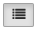

**Step 5:**  Select "Print" from _your browser's_ "file" menu.  Print directly to a PDF.

**Step 6:**  Make sure all your answers are visible and not cut off the side of the page.

**Step 7:**  Turn in that PDF via gradescope.

<div class="alert alert-block alert-danger">

**Print Carefully** It's important that you print directly to a PDF.  In particular, you should _not_ do any of the following:
    
1. **Do not** select "Print Preview" and then print that. (Remarkably, this is not the same as printing directly, so it's not clear what it is a preview of)
2. **Do not** select `Download as-> PDF via LaTex.  It generates nothing useful.
    
</div>

In gradescope, you'll need to show us where all your answers are.  Please do this carefully, if we can't find your answer, we can't grade it.

## The Programming Assignment

You'll turn in your programming assignment by providing gradescope with your github repo.   It'll run the autograder and return the results.

## Lab Survey

Please fill out this survey when you've finished the lab.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

In [8]:
from IPython.display import IFrame    
IFrame('https://docs.google.com/forms/d/1xIYT16NuMV_ocYWY3ttDuoR01yt4if63mOviZRyAUXg/viewform?embedded=true', width=800, height=2000)


Ignore this.